# **Used Cars Price Prediction**

## **Executive Summary -**

This project proposes the model for the prediction and forecasting of used car prices in the Indian market. The model utilizes data from the 2018-19 consumer auto-purchasing cycle, a period when the market for second-hand cars (4.0 million units) was seen to overtake the market for new car purchases (3.6 million units). The suggested model conforms with observed data and is highly predictive of new data based on low error in RMSE & MAPE performance metrics. Having said this, the model is limited by the lack of consideration for changing consumer preferences over time and the interaction of available features. It is recommended that our client - Cars4U - implement a price differential strategy that targets used cars with outperformance along and power, age, engine variables - and used cars that are predominantly automatic in trasnmission - in order to maximize business profitability.

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

*   This is an important problem for the commercial success of the Cars4U.
*   The market for used cars is less well understood than the market for new cars, and, additionally, the market for used cars is the target market given the opportunity for Cars4U to profit from understanding how to fairly/accurately price used cars in a market that is currently largely driven by intangibles.
*   The quality of the problem solution will determine the ability for Cars4U to accurately predict the price of used cars in the Indian market, thus being able to grow the market and capture a competitive share.

### **The objective:**

 - What is the intended goal?

*   The goal of this research is to produce a machine learning model that will accurately predict the price of a used car (unseen) in the market for used cars in India.

### **The key questions:**

- What are the key questions that need to be answered?

*   Which features are most important in explaining the existing prices on used cars?
*   What kind of machine learning model can be used to predict the price of used cars in this market?
*   What are the most appropriate methods for evaluating such a model?
*   What data is there available, is it appropriate, valid and therefor useful in practical price prediction?


### **The problem formulation**:

- What is it that we are trying to solve using data science?

*   The data science techniques exhibited will allow to determine the most efficient means for pricing a used car in this market - we are trying to solve the problem of price predicition for the used car market with the least predictive error for new (unseen) used cars.



### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
#importing necessary libraries for EDA, Visualization & Miscellaneous

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import math

# Importing libraries for building linear regression model

from sklearn import linear_model

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing libraries for scaling the data

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import RobustScaler

### **Let us load the data**

In [161]:
#reading the dataset

df = pd.read_csv('/content/drive/MyDrive/MIT Data Science/Capstone/data input/used_cars.csv')

In [162]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [163]:
#We can drop Serial No.
df.drop('S.No.',axis = 1, inplace=True)

In [164]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## Data Overview

- Observations
- Sanity checks

In [165]:
#Looking at the nature of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


**Observations -**

*   There are some missing values across mileage, engine, power, seats, New_price & Price.



## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [166]:
#Splitting variables into numerical & categorical

cat_cols = ['Location','Fuel_Type','Transmission','Owner_Type','Seats']
num_cols = ['Kilometers_Driven','Mileage','Engine','Power','New_price', 'Price']

In [167]:
#Can we just display the info for the meaninfgul numerical variables? Adjusting Kilometers Driven variable for display purposes.

df = df.astype({'Kilometers_Driven':'float64'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   float64
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 736.8+ KB


In [168]:
#Summary Stats for meaningful numerical variables

df.describe(include = np.float64).T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

**Categorical Variables -**

In [169]:
#Looking at the number of 'buckets' across numerical & categorical variables
df.nunique()

,0
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,438
Engine,150
Power,383


In [170]:
#Looking at the distribution of categorical variables

print(df['Location'].value_counts(normalize=True),'\n')
print(df['Fuel_Type'].value_counts(normalize=True),'\n')
print(df['Transmission'].value_counts(normalize=True),'\n')
print(df['Owner_Type'].value_counts(normalize=True),'\n')
print(df['Seats'].value_counts(normalize=True),'\n')

Location
Mumbai        0.130842
Hyderabad     0.120778
Coimbatore    0.106439
Kochi         0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: proportion, dtype: float64 

Fuel_Type
Diesel      0.531091
Petrol      0.458431
CNG         0.008548
LPG         0.001654
Electric    0.000276
Name: proportion, dtype: float64 

Transmission
Manual       0.717496
Automatic    0.282504
Name: proportion, dtype: float64 

Owner_Type
First             0.820626
Second            0.158831
Third             0.018889
Fourth & Above    0.001654
Name: proportion, dtype: float64 

Seats
5.0     0.840000
7.0     0.110556
8.0     0.023611
4.0     0.016528
6.0     0.005278
2.0     0.002500
10.0    0.001111
9.0     0.000417
Name: proportion, dtype: float64 



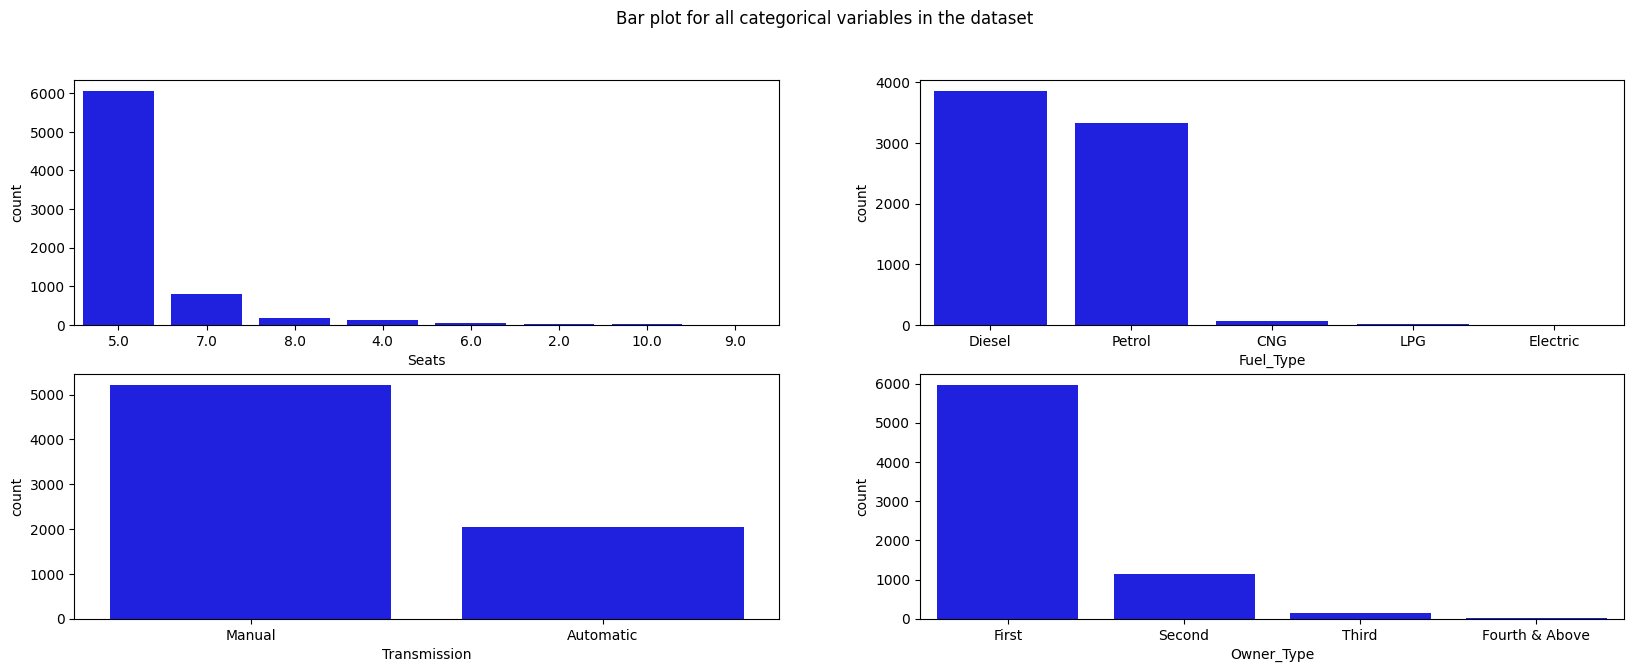

In [171]:
#Visualizing Categorical Variable Distributions (excluding Location variable)

fig, axes = plt.subplots(2, 2, figsize = (20, 7))

fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax = axes[0, 0], x = 'Seats', data = df, color = 'blue',
              order = df['Seats'].value_counts().index);

sns.countplot(ax = axes[0, 1], x = 'Fuel_Type', data = df, color = 'blue',
              order = df['Fuel_Type'].value_counts().index);

sns.countplot(ax = axes[1, 0], x = 'Transmission', data = df, color = 'blue',
              order = df['Transmission'].value_counts().index);

sns.countplot(ax = axes[1, 1], x = 'Owner_Type', data = df, color = 'blue',
              order = df['Owner_Type'].value_counts().index);


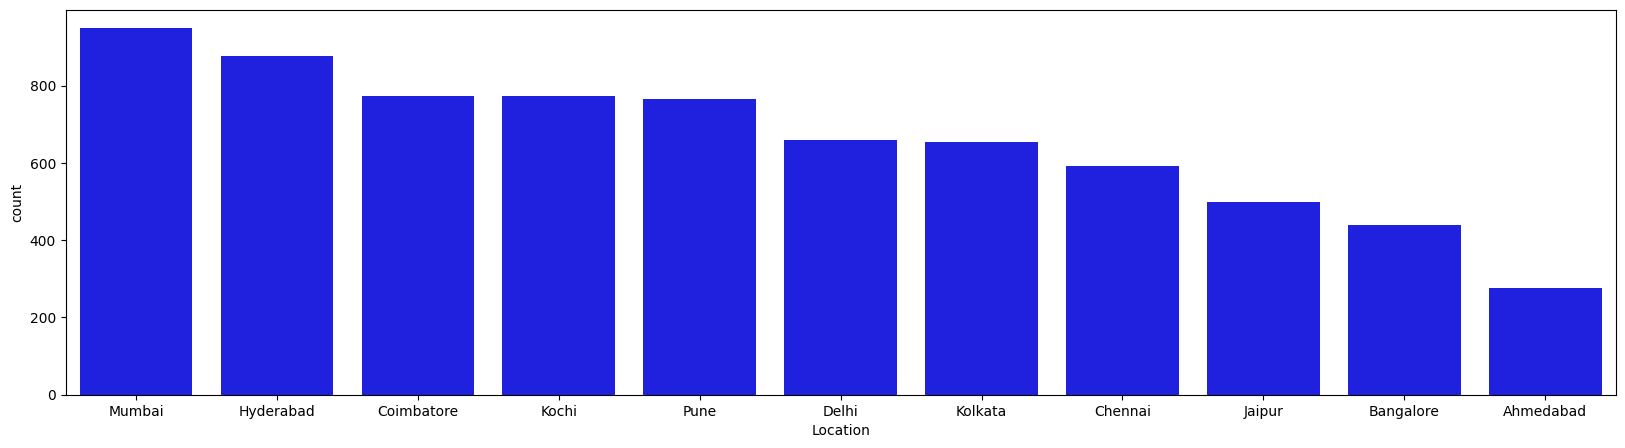

In [172]:
#Looking at the distribution of the location variable

plt.figure(figsize = (20,5))

sns.countplot(x = 'Location', data = df, color = 'blue', order = df['Location'].value_counts().index, );

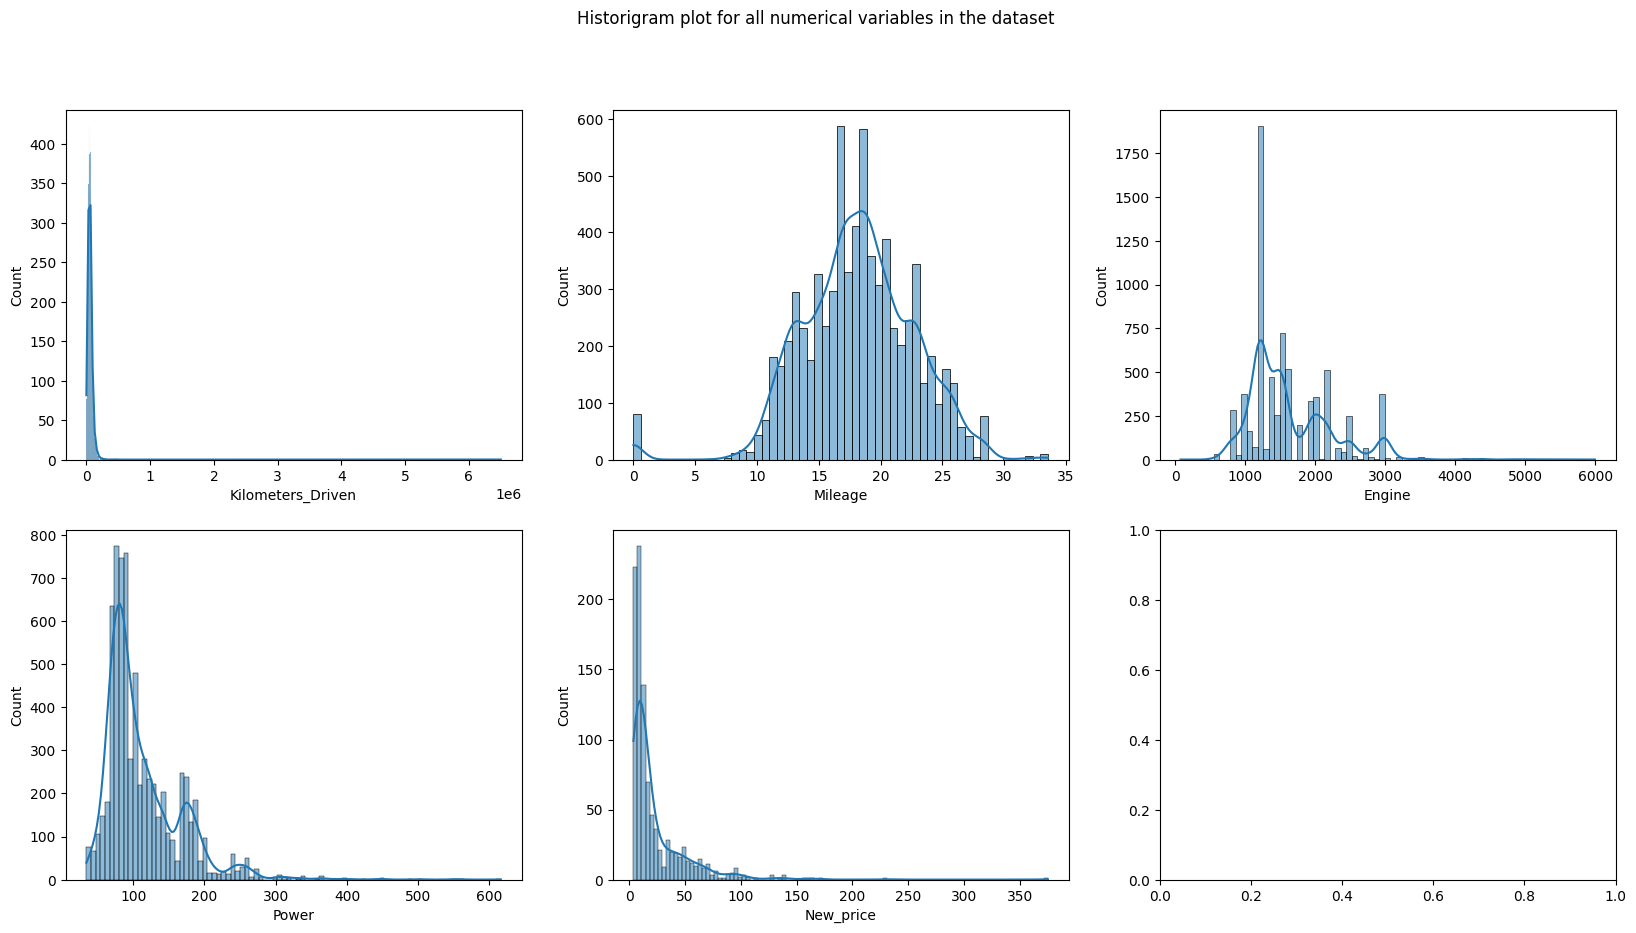

In [173]:
#Looking at distribution of numerical variables

fig, axes = plt.subplots(2, 3, figsize = (20, 10))

fig.suptitle('Historigram plot for all numerical variables in the dataset')

sns.histplot(ax = axes[0, 0], data = df['Kilometers_Driven'], kde = True);

sns.histplot(ax = axes[0, 1], data = df['Mileage'], kde = True);

sns.histplot(ax = axes[0, 2], data = df['Engine'], kde = True);

sns.histplot(ax = axes[1, 0], data = df['Power'], kde = True);

sns.histplot(ax = axes[1, 1], data = df['New_price'], kde = True);


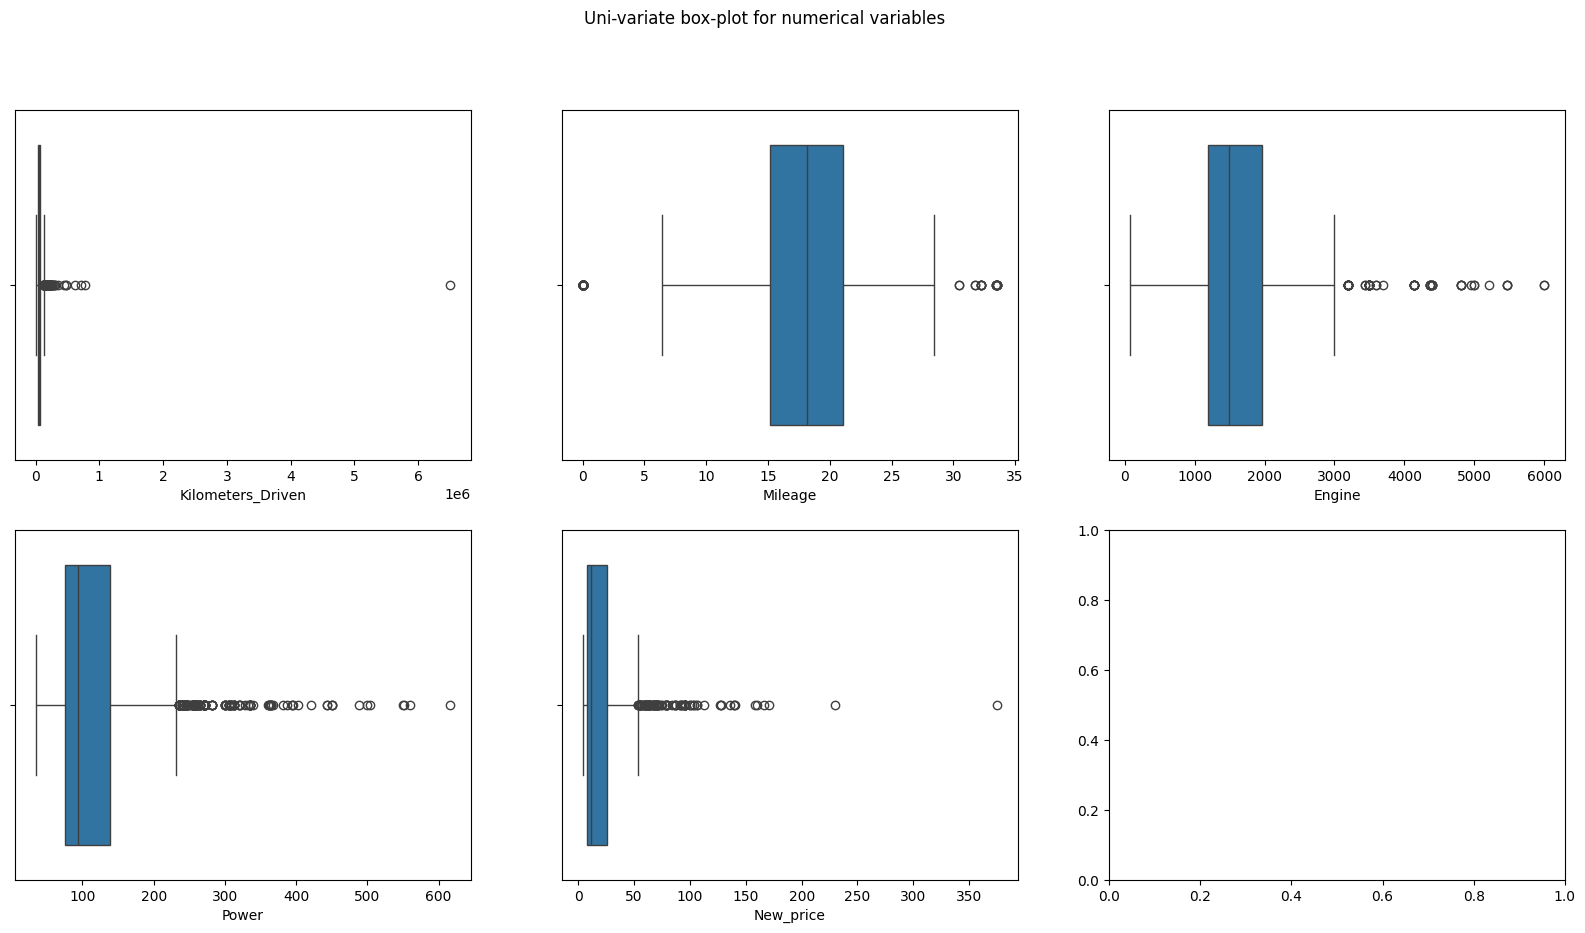

In [174]:
#Looking at the skew & outlier distribution for numerical variables

fig, axes = plt.subplots(2, 3, figsize = (20, 10))

fig.suptitle('Uni-variate box-plot for numerical variables')

sns.boxplot(ax = axes[0,0], data = df['Kilometers_Driven'], orient = "h");

sns.boxplot(ax = axes[0,1], data = df['Mileage'], orient = "h");

sns.boxplot(ax = axes[0,2], data = df['Engine'], orient = "h");

sns.boxplot(ax = axes[1,0], data = df['Power'], orient = "h");

sns.boxplot(ax = axes[1,1], data = df['New_price'], orient = "h");

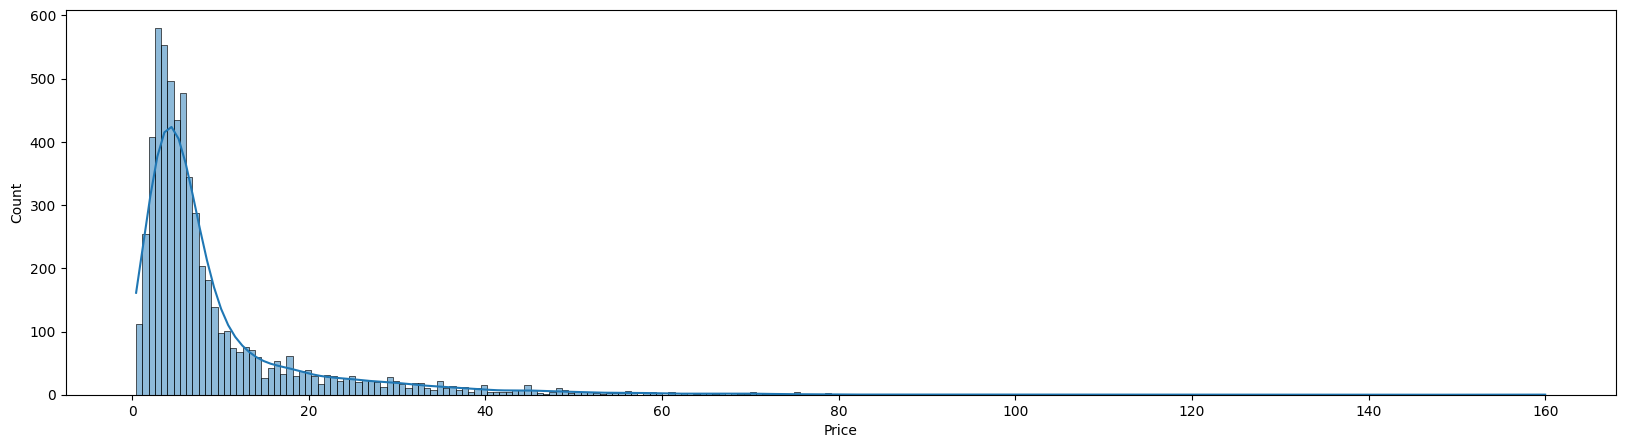

In [175]:
#Taking a closer look at the dependent variable - Car Price

plt.figure(figsize = (20, 5))

fig.suptitle('Historigram & Box-plot for Price Target Variable')

sns.histplot(data = df['Price'], kde = True);

<Axes: xlabel='Price'>

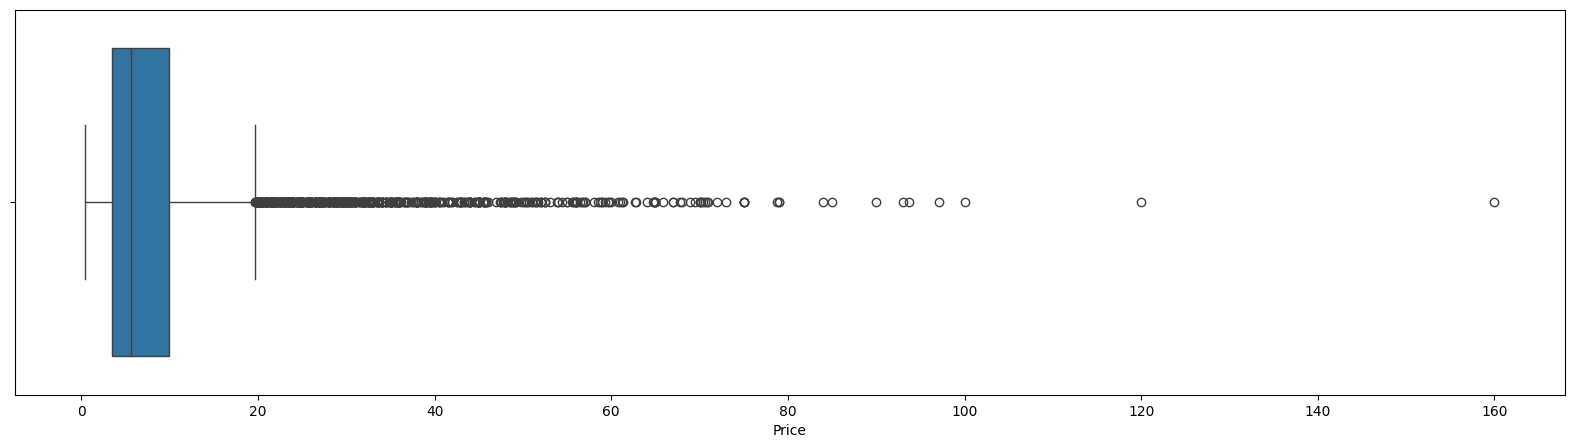

In [176]:
#Box-plot for dependent variable - car price

plt.figure(figsize = (20, 5))

sns.boxplot(orient = 'h', data = df['Price'])


**Observations -**

*   The target 'Price' variable is skewed - we may need to look at a log transformation.

Categorical:
*   Most of the cars have 5 seats (84%)
*   Most of the cars are powered by diesel (53%) or petrol (46%)
*   Majority (72%) of the cars are manually operated
*   Majority (82%) of the cars are first-time owned (i.e. bought new)
*   The location of the cars in the dataset is relatively evenly distributed (Mumbai carries the largest proportion at about 13%)

Numerical:
*   Kilometers Driven, Engine, Power & New Price all demonstrate similar rightward-skew to the dependent 'Price' variable - i.e. the mean is being dragged significantly higher than the median due to potential outliars at higher values.

Unrealistic Values:
*   The box-plot distributions gives us a nice visual as to which values across our skewed variables might be unrealistic - namely, kilometers driven. New_price, Engine & Power look like they could have some outliers, but unsure whether these are unrealistic based on lack of domain knowledge.  




In [177]:
#Let's remove the unrealistic values

#Kilometers Driven

df[df['Kilometers_Driven'] == 6500000]

df.drop(2328, inplace=True)

df.Kilometers_Driven.max()

775000.0

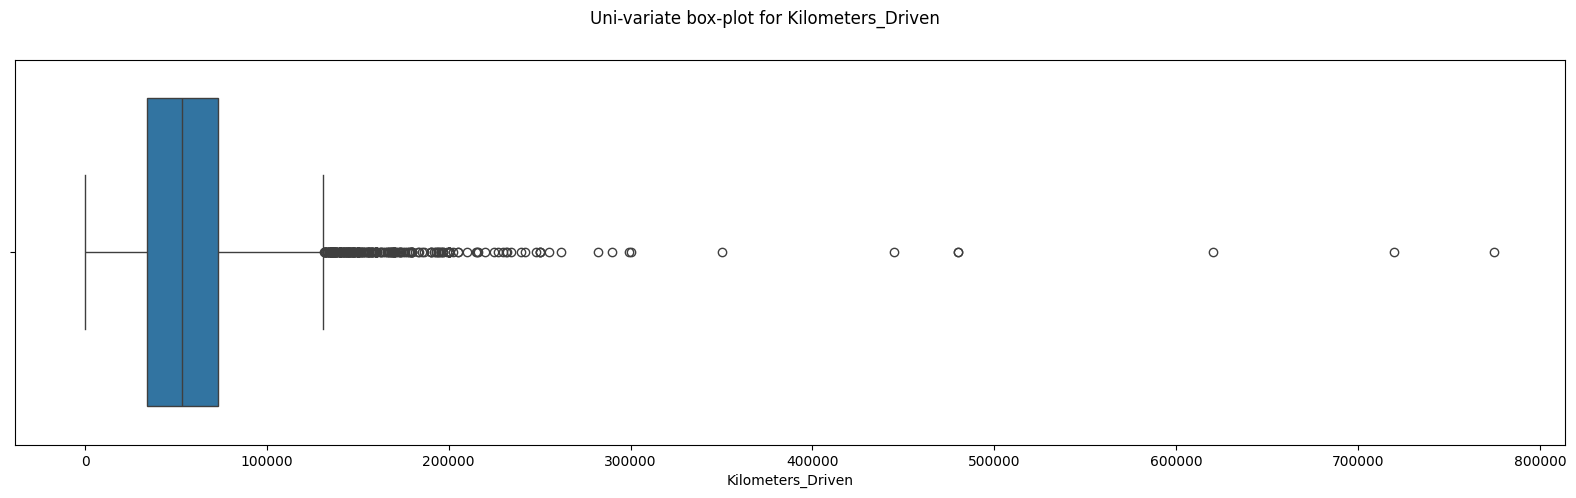

In [178]:
#Looking at the new distribution

fig = plt.figure(figsize = (20, 5))

fig.suptitle('Uni-variate box-plot for Kilometers_Driven')

sns.boxplot(data = df['Kilometers_Driven'], orient = "h");

**Log Transformations -**

In [179]:
#Performing log transformations on Kilometers_Driven, Power, New_price, & our Price target variable

df['Kilometers_Driven_log'] = np.log10(df['Kilometers_Driven'])
df['Power_log'] = np.log10(df['Power'])
df['New_price_log'] = np.log10(df['New_price'])
df['Price_log'] = np.log10(df['Price'])

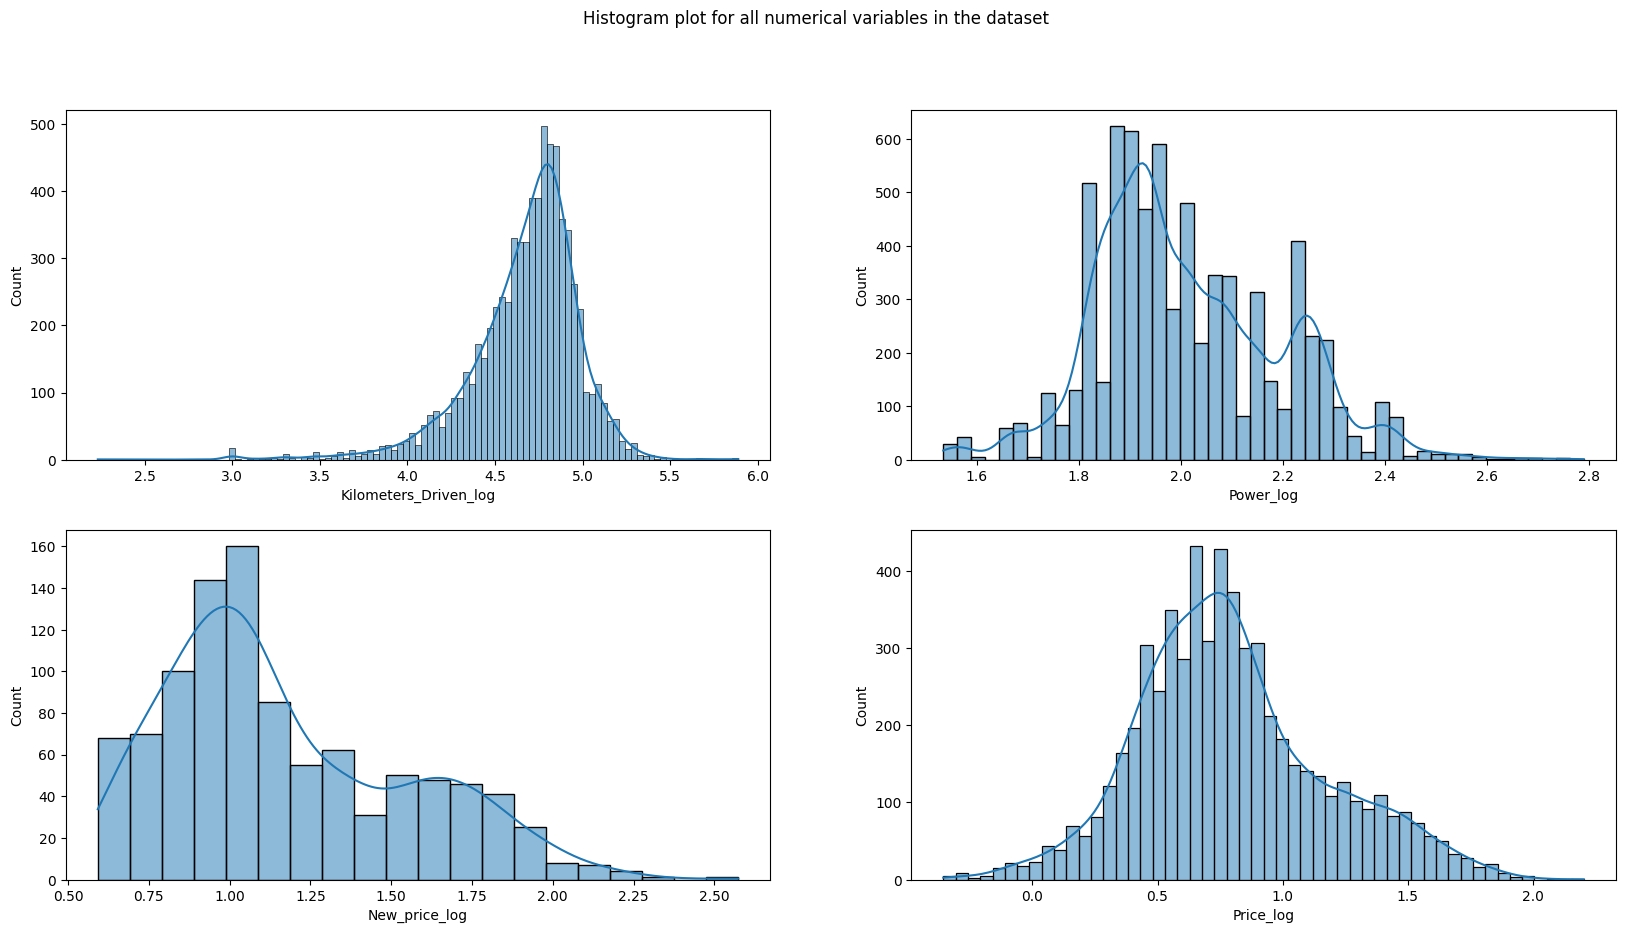

In [180]:
#Looking at the new distribution shape of our transformed variables

fig, axes = plt.subplots(2, 2, figsize = (20, 10))

fig.suptitle('Histogram plot for all numerical variables in the dataset')

sns.histplot(ax = axes[0, 0], data = df['Kilometers_Driven_log'], kde = True);

sns.histplot(ax = axes[0, 1], data = df['Power_log'], kde = True);

sns.histplot(ax = axes[1, 0], data = df['New_price_log'], kde = True);

sns.histplot(ax = axes[1, 1], data = df['Price_log'], kde = True);

**Observations -**

All of our majorly skewed variables now tend towards a normal distribution after the log transformation.

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values (if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

<Axes: >

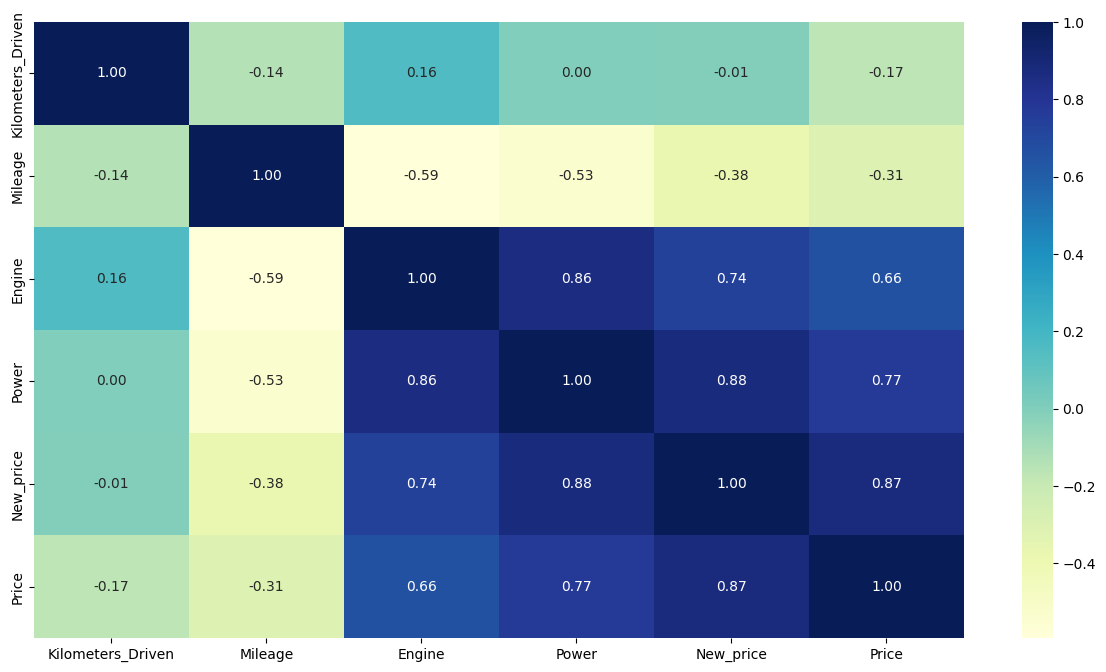

In [181]:
df_num = df[num_cols]

plt.figure(figsize = (15, 8))

sns.heatmap(df_num.corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

**Observations -**

Dependent Variable (Price) -
*   Price is highly correlated with New_price (0.87)
*   Price is also relatively highly correlated with Power (0.77)

Independent Variables -
*   Engine & Power are highly correlated (0.86)
*   Engine & New_price are highly correlated (0.74)
*   Power & New_price are highly correlated (0.88)





**Dependent (Price) Bivariate Visualizations**

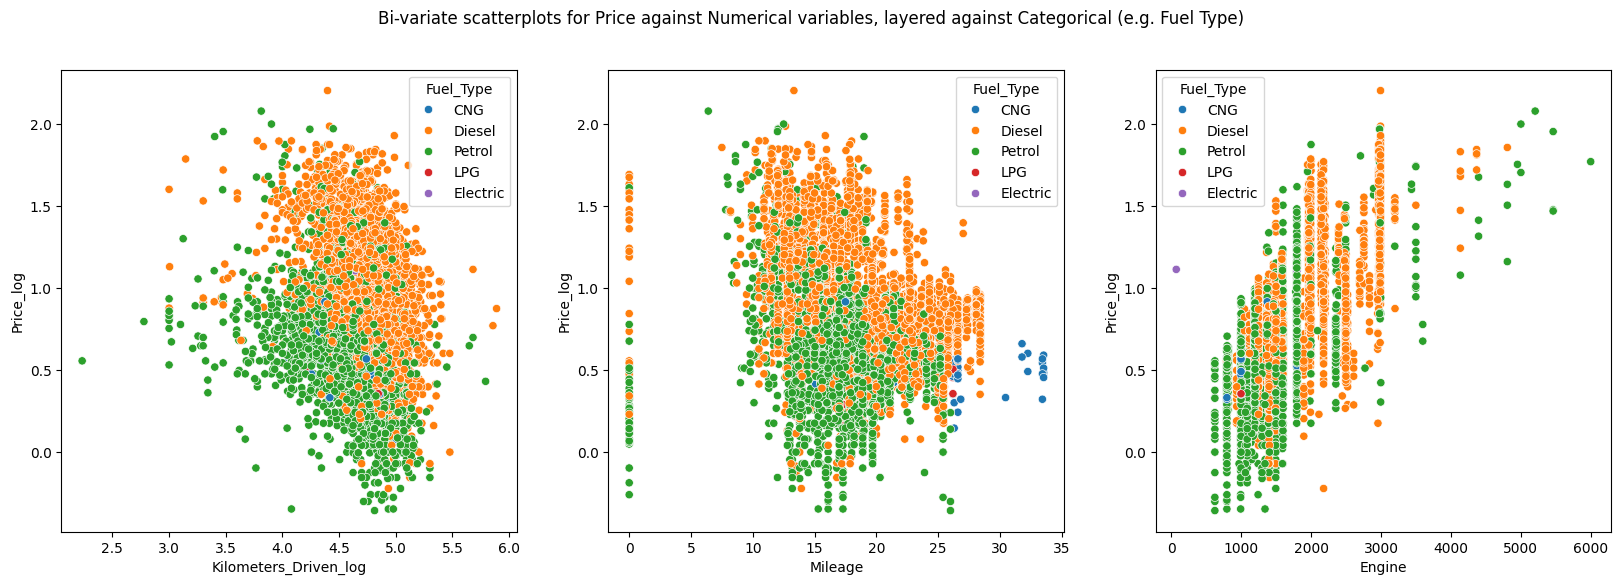

In [182]:
#Scatter plots between independent variables

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Bi-variate scatterplots for Price against Numerical variables, layered against Categorical (e.g. Fuel Type)')

sns.scatterplot(x = 'Kilometers_Driven_log', y = 'Price_log', data = df, ax = axes[0], hue = 'Fuel_Type');

sns.scatterplot(x = 'Mileage', y = 'Price_log', data = df, ax = axes[1], hue = 'Fuel_Type');

sns.scatterplot(x = 'Engine', y = 'Price_log', data = df, ax = axes[2], hue = 'Fuel_Type');



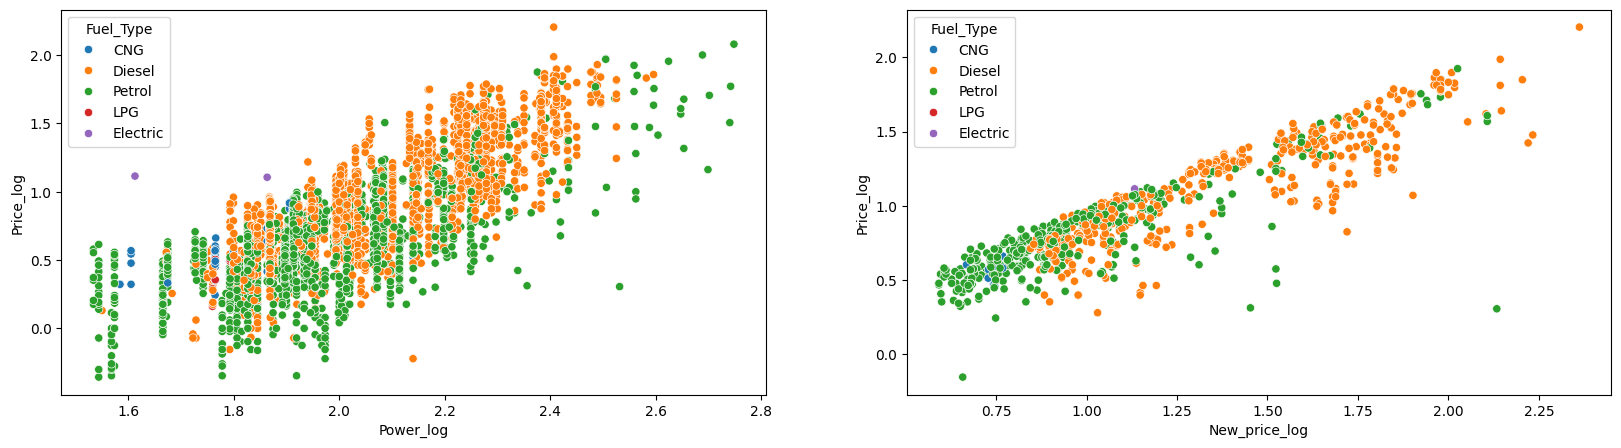

In [183]:
#Scatter plots between independent variables

fig, axes = plt.subplots(1, 2, figsize = (20, 5))

sns.scatterplot(x = 'Power_log', y = 'Price_log', data = df, ax = axes[0], hue = 'Fuel_Type');

sns.scatterplot(x = 'New_price_log', y = 'Price_log', data = df, ax = axes[1], hue = 'Fuel_Type');

<ipython-input-184-dc8bcd967d9d>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Year', y = 'Price_log', data = df, ci = None, estimator = 'mean');


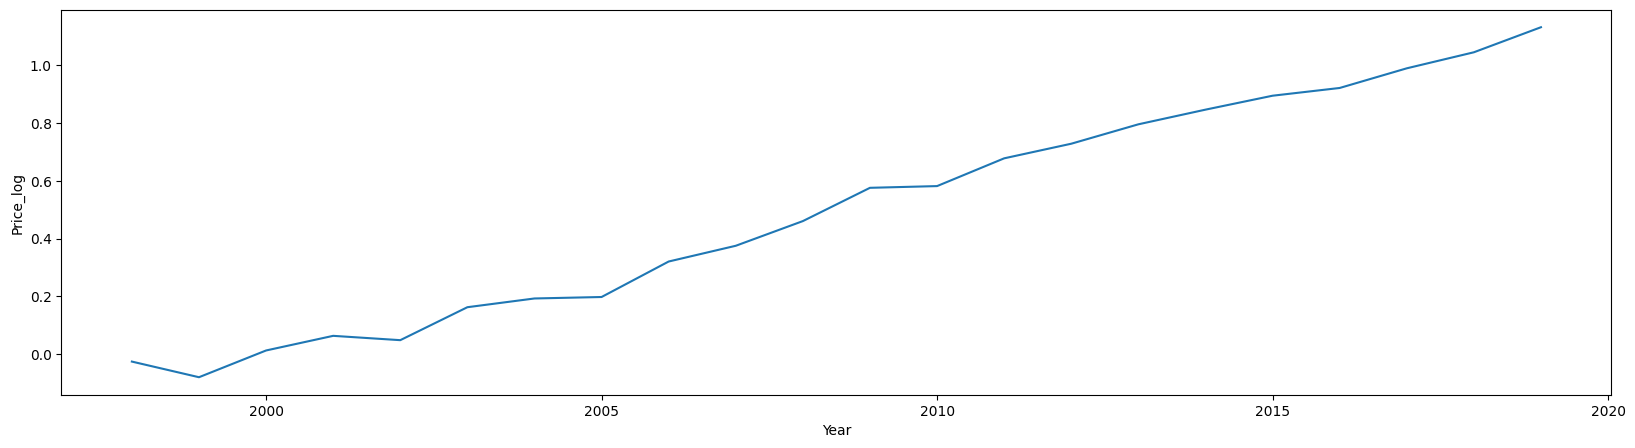

In [184]:
#Looking at average log-transformed price over different car vintage (year made)

fig = plt.figure(figsize = (20, 5))

sns.lineplot(x = 'Year', y = 'Price_log', data = df, ci = None, estimator = 'mean');

**Observations -**

Numerical Patters (Shape) -
*   The log-transformed price variable exhibits a clear positive, linear trend against Engine, log-transformed Power, & log-transformed new price.
*   There doesn't appear to be any discernable pattern against log-transformed kilometers driven or mileage.

Categorical Patterns (Cluster) -
*   The Location variable exhibits no discernable pattern against the variance of log price against other numerical variables.
*   The fuel type variable shows that cars using Diesel fuel type have typically driven more kilometers, have more mileage, have a stronger engine, have more max power, and are repriced at greater value for new models (all lending to generally higher car prices).
*   The transmission type variable shows that automatic cars typically have more kilometers driven, have more mileage, have a stronger engine, have more max power, and are repriced at greater value for new models (all lending to generally higher car prices).
*   The Owner type variable exhibits no discernable pattern against the variance of log price against other numerical variables.
*   The seat variable exhibits no discernable pattern against the variance of log price against other numerical variables.

Temporal Patterns (Line) -
*   On average, the price of the used cars increases as the vintage of the car has increased - i.e. used cars with a more recent production are more expensive.







**Box Plot of target Price variable vs. Location**

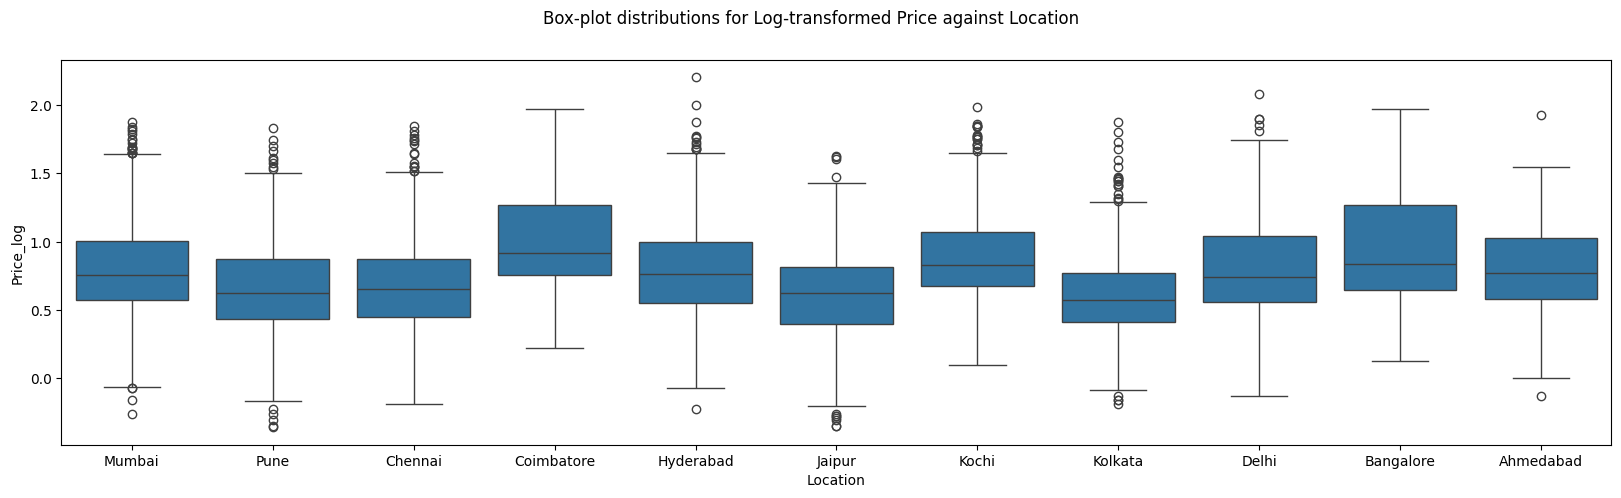

In [185]:
#Looking at the new distribution

fig = plt.figure(figsize = (20, 5))

fig.suptitle('Box-plot distributions for Log-transformed Price against Location')

sns.boxplot(data = df, x = 'Location', y = 'Price_log');

**Observations -**

*   Coimbatore, Bangalore & Kochi have discernably higher median prices for used cars than other locations in this data set.
*   The other locations have used cars on par with the prices in these top three, however they are seen as outliers.
*   Jaipur has noticeable cheaper used car prices than other locations, with less outliers at the top end (more at the bottom) to skew the median price higher, as in other locations.





### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [186]:
#Changing the Name column to lowercase
df['Name'] = df['Name'].str.lower()

#Extracting the Brand & Model from the 'Name' column
df['Brand'] = df['Name'].str.split().str[0]

df['Model'] = df['Name'].str.split().str[1]

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Brand,Model
0,maruti wagon r lxi cng,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,4.857332,1.764624,NaN,0.243038,maruti,wagon
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,4.612784,2.101059,NaN,1.096910,hyundai,creta
2,honda jazz v,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,4.662758,1.947924,0.935003,0.653213,honda,jazz
3,maruti ertiga vdi,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,4.939519,1.948217,NaN,0.778151,maruti,ertiga
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,4.609274,2.148603,NaN,1.248954,audi,a4


In [187]:
df.nunique()

,0
Name,2017
Location,11
Year,23
Kilometers_Driven,3659
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,438
Engine,150
Power,383


**Observations -**

There are now 33 unique brand names and 218 unique models to work from - let's do a quick exploration to see the distribution of the new categorical variables.

Brand Variable -

In [188]:
#Sense check on the new car brands in the data set?

print(df['Brand'].value_counts(), '\n')

Brand
maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               311
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
ambassador          1
smart               1
lamborghini         1
hindustan           1
opelcorsa           1
Name: count, dtype: int64 



**Observations -**

*   After a sense check, we need to adjust the observations for landrover - our code has incorrectly split 'rover' into the model column.
*   This should treat 67 observations of the dataset with landrover car brand



In [189]:
#land isn't a recognizable car brand - slicing the data for 'land' output

df[df['Brand'] == 'land']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Brand,Model
13,land rover range rover 2.2l pure,Delhi,2014,72000.0,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,27.00,4.857332,2.273464,NaN,1.431364,land,rover
14,land rover freelander 2 td4 se,Pune,2012,85000.0,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,NaN,17.50,4.929419,2.060698,NaN,1.243038,land,rover
191,land rover range rover 2.2l dynamic,Coimbatore,2018,36091.0,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,55.76,4.557399,2.273464,NaN,1.746323,land,rover
311,land rover range rover hse dynamic,Delhi,2017,44000.0,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,44.00,4.643453,2.273464,NaN,1.643453,land,rover
399,land rover range rover 2.2l dynamic,Hyderabad,2012,56000.0,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,30.00,4.748188,2.273464,NaN,1.477121,land,rover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,land rover discovery 4 sdv6 se,Kochi,2012,89190.0,Diesel,Automatic,Second,11.40,2993.0,245.41,7.0,NaN,NaN,4.950316,2.389892,NaN,NaN,land,rover
6717,land rover discovery sport td4 s,Kochi,2018,23342.0,Diesel,Automatic,First,12.83,2179.0,147.50,5.0,NaN,NaN,4.368138,2.168792,NaN,NaN,land,rover
6857,land rover freelander 2 td4 se,Mumbai,2011,87000.0,Diesel,Automatic,First,0.00,2179.0,115.00,5.0,NaN,NaN,4.939519,2.060698,NaN,NaN,land,rover
7157,land rover range rover 2.2l pure,Hyderabad,2015,49000.0,Diesel,Automatic,Second,12.70,2179.0,187.70,5.0,NaN,NaN,4.690196,2.273464,NaN,NaN,land,rover


In [190]:
#creating a dataframe for landrover observations
df_landrover = df.loc[df.Brand == 'land']

#reassigning instances of the 'land' brand to 'landrover'
df.loc[df.Brand == 'land', ['Brand']] = df_landrover['Name'].str[:10]

In [191]:
#checking the plug has worked
df['Brand'].value_counts()

,count
Brand,
maruti,1444
hyundai,1340
honda,743
toyota,507
mercedes-benz,380
volkswagen,374
ford,351
mahindra,331
bmw,311


In [192]:
#adjusting the 'Model' observation for these instances

#reassigning instances of the 'land' brand to 'landrover'
df.loc[df.Brand == 'land rover', ['Model']] = df_landrover['Name'].str.split().str[2]

#checking the implementation
df.loc[df.Brand == 'land rover', ['Name','Brand','Model']]

,Name,Brand,Model
13,land rover range rover 2.2l pure,land rover,range
14,land rover freelander 2 td4 se,land rover,freelander
191,land rover range rover 2.2l dynamic,land rover,range
311,land rover range rover hse dynamic,land rover,range
399,land rover range rover 2.2l dynamic,land rover,range
...,...,...,...
6434,land rover discovery 4 sdv6 se,land rover,discovery
6717,land rover discovery sport td4 s,land rover,discovery
6857,land rover freelander 2 td4 se,land rover,freelander
7157,land rover range rover 2.2l pure,land rover,range


**Observations -**

*   We can now see that any instances of 'land rover' show the full Brand name with the correct indication of the Model!
*   Let's look at the distribution of car brand & model with respect to our target log-price variable.






**Car Brand -**

In [193]:
#What are the top 5 most popular car brands in this data set?

df['Brand'].value_counts(normalize=True).head(5)

,proportion
Brand,
maruti,0.199117
hyundai,0.184777
honda,0.102454
toyota,0.069912
mercedes-benz,0.052399


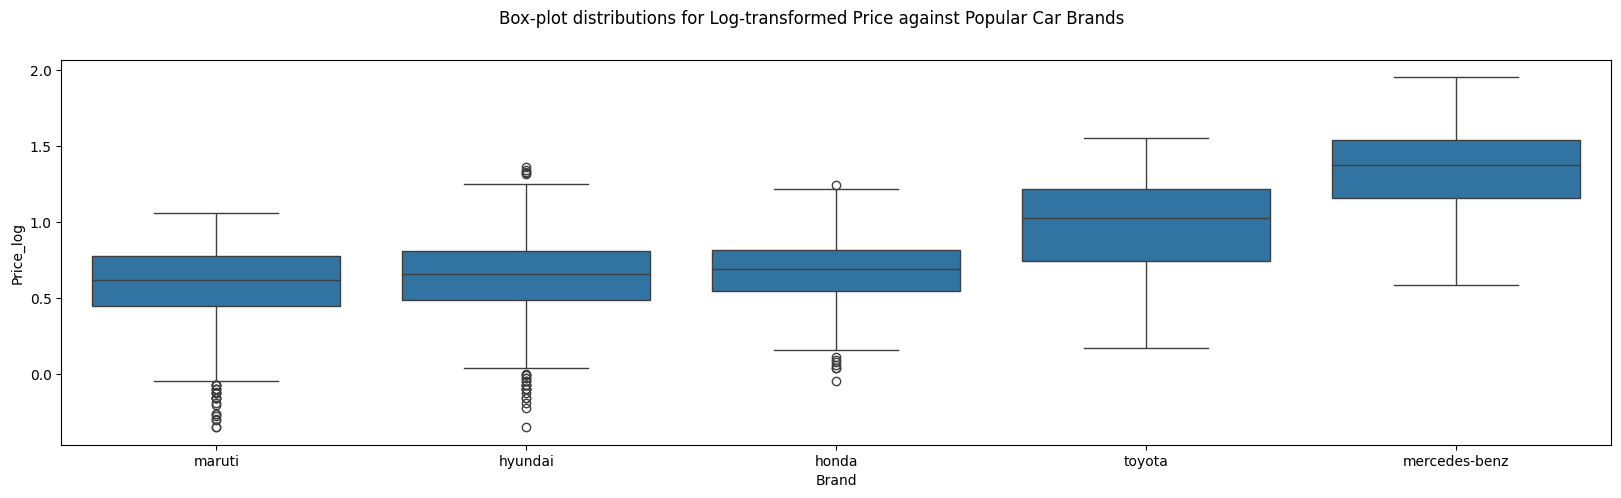

In [194]:
#Can we get a look at the distribution of the most popular car brands with regards to our log-transformed Price variable?

#temp data set to see distribution of only the most popular car brands
df_temp = df[df['Brand'].isin(['maruti', 'hyundai', 'honda', 'toyota', 'mercedes-benz'])]

fig = plt.figure(figsize = (20, 5))

fig.suptitle('Box-plot distributions for Log-transformed Price against Popular Car Brands')

sns.boxplot(data = df_temp, x = 'Brand', y = 'Price_log');

**Car Model -**

In [195]:
#Which models are the most popular for our top three most popular car brands?
df_maruti = df[df['Brand'] == 'maruti']
df_hyundai = df[df['Brand'] == 'hyundai']
df_honda = df[df['Brand'] == 'honda']

print(df_maruti['Model'].value_counts(normalize=True).head(5), '\n')
print(df_hyundai['Model'].value_counts(normalize=True).head(5), '\n')
print(df_honda['Model'].value_counts(normalize=True).head(5), '\n')

Model
swift     0.289474
alto      0.126731
wagon     0.123269
ertiga    0.059557
ciaz      0.057479
Name: proportion, dtype: float64 

Model
i20      0.226119
verna    0.149254
i10      0.135075
grand    0.133582
creta    0.088060
Name: proportion, dtype: float64 

Model
city     0.427995
amaze    0.170929
brio     0.107672
jazz     0.094213
civic    0.052490
Name: proportion, dtype: float64 



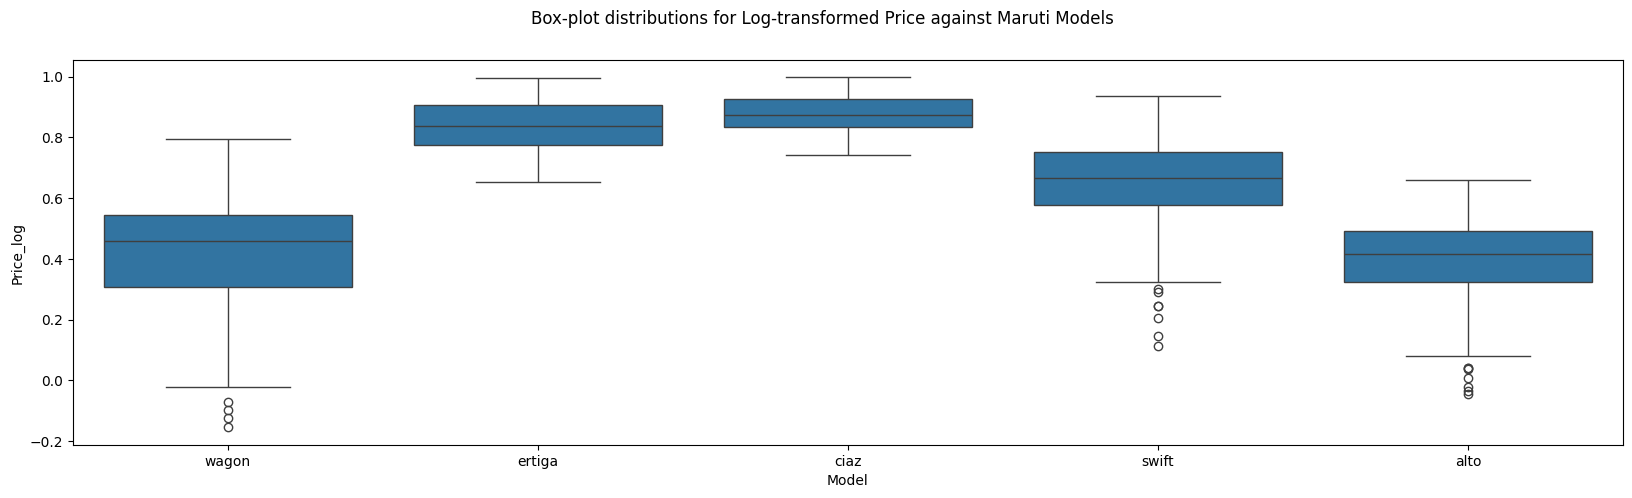

In [196]:
#do the specific car models have an influence on price?

#Looking at the distriubtion of prices for the top 5 Maruti models

df_temp2 = df[df['Model'].isin(['swift', 'alto', 'wagon', 'ertiga', 'ciaz'])]

fig = plt.figure(figsize = (20, 5))

fig.suptitle('Box-plot distributions for Log-transformed Price against Maruti Models')

sns.boxplot(data = df_temp2, x = 'Model', y = 'Price_log');

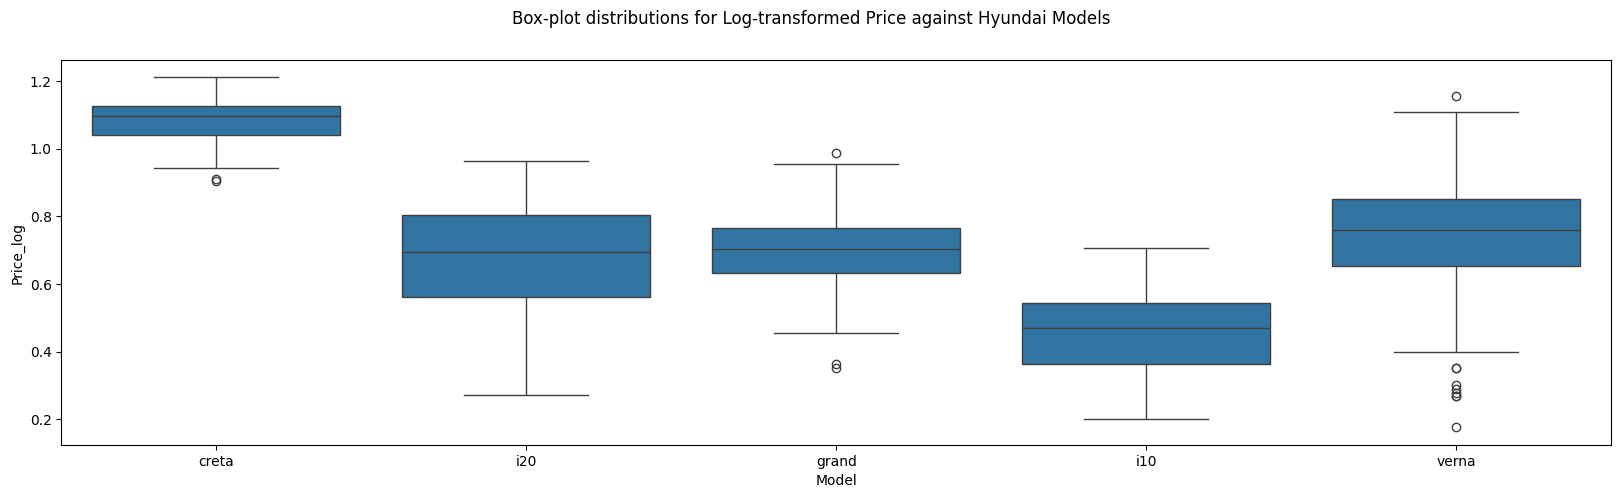

In [197]:
#Looking at the distriubtion of prices for the top 5 Hyundai models

df_temp3 = df[df['Model'].isin(['i20', 'verna', 'i10', 'grand', 'creta'])]

fig = plt.figure(figsize = (20, 5))

fig.suptitle('Box-plot distributions for Log-transformed Price against Hyundai Models')

sns.boxplot(data = df_temp3, x = 'Model', y = 'Price_log');

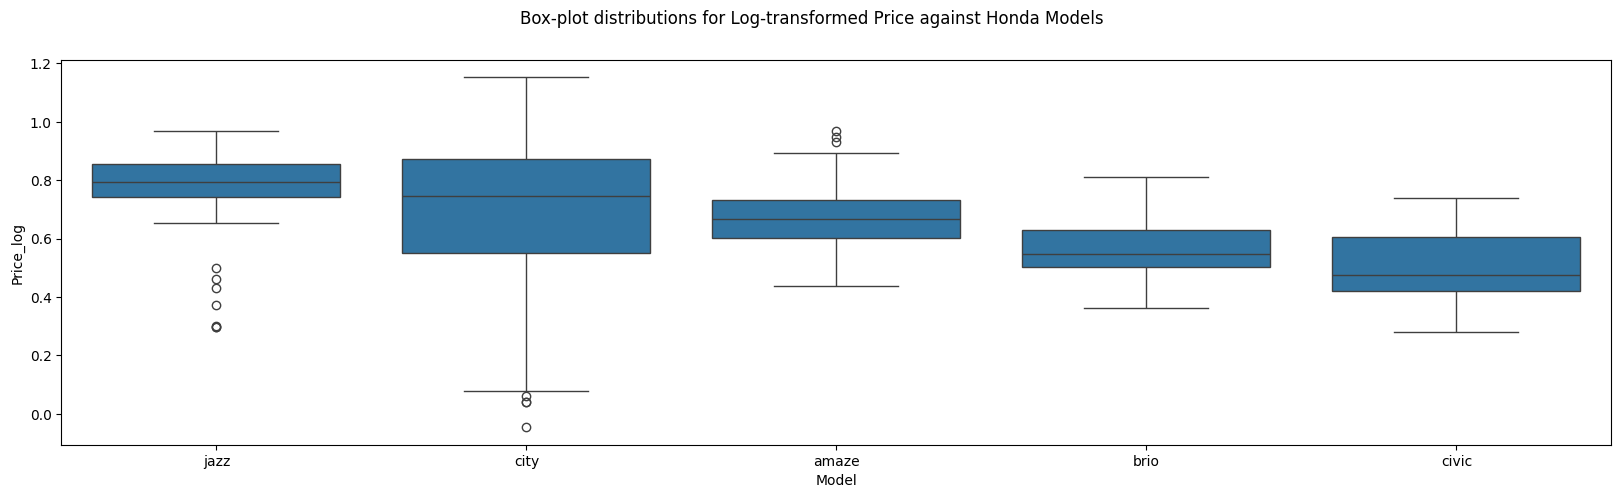

In [198]:
#Looking at the distriubtion of prices for the top 5 Honda models

df_temp4 = df[df['Model'].isin(['city', 'amaze', 'brio', 'jazz', 'civic'])]

fig = plt.figure(figsize = (20, 5))

fig.suptitle('Box-plot distributions for Log-transformed Price against Honda Models')

sns.boxplot(data = df_temp4, x = 'Model', y = 'Price_log');

**Observations -**

*   The car brands are relatively skewed in this data set - i.e. the top 5 car brands make up over 60% of the observations across 33 brands in the data set.
*   The car models are also relatively skewed - i.e. for our top three car brands, the top 5 models make up over 65%, 73% and 85% of the cars for that brand, respectively, in this dataset.
*   The most prominent models are the maruti swift, the hyundai i20, and the Honda city, respectively.
*   Mercedes-Benz & Toyota have higher median prices for used cars in India - perhaps indicative of a beneficial explanatory variable.
*   We can also see that the car model for specific brands has a meaningful influence on the log-transformed car price - for example, the Maruti ciaz & ertiga, the Hyundai Creta, and the Honda Jazz all have higher median used prices, relative to their respective brand-model comparisons.
*   We are assuming that there are sufficient observations of other car brands & models in the sample to give a meaningful indication of their population price statistic - i.e. the delta in price distribution is not a product of data availability.



**Pegging the Year variable -**

*   Given that the year variable is stepwise/interval scaled, we will translate into the number of years passed prior to data collection (origin) - i.e. the age of the vehicle (in years).
*   The data is listed as being collected across 2018-19, so we will assume that full data processing was finalzied in 2019, thus the cars age will be the number of years between manufacture & 2019.



In [199]:
#creating an age feature using the year column

df['Car_Age'] = 2019 - df['Year']

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Brand,Model,Car_Age
0,maruti wagon r lxi cng,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,4.857332,1.764624,NaN,0.243038,maruti,wagon,9
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,4.612784,2.101059,NaN,1.096910,hyundai,creta,4
2,honda jazz v,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,4.662758,1.947924,0.935003,0.653213,honda,jazz,8
3,maruti ertiga vdi,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,4.939519,1.948217,NaN,0.778151,maruti,ertiga,7
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,4.609274,2.148603,NaN,1.248954,audi,a4,6


### **Missing value treatment**


*   The missing values that we are exploring here are across mileage, engine, power, seats, & New_price.
*   Let's confirm that these values are missing, then try to find relationships with other variables in order to impute these missing values.
*   We will then test summary stats of these impacted columns in order to make sure that the distribution isn't majorly impacted.





In [200]:
#How many values are missing from each column?

df.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46
Power,175


**Mileage -**

*   We want to impute the missing values in the mileage column.
*   Mileage = 0 observations don't necessarily make sense - perhaps the company sells electric vehicles, therefor is not indicative of actual mileage for the vehicle. We should also impute for any instances of 0.




In [201]:
#indices of observations with null mileage values
mileage_index_null = df[df['Mileage'].isnull()].index

In [202]:
#indices of observations with zero mileage values
mileage_index_zero = df[df['Mileage'] == 0].index

In [203]:
#looking at the Mileage, Brand & Model of car for null values
df.loc[mileage_index_null, ['Mileage','Brand','Model']]

,Mileage,Brand,Model
4446,NaN,mahindra,e
4904,NaN,toyota,prius


In [204]:
#looking at the Brand & Model of cars for the zero values
df_temp5 = df.loc[mileage_index_zero, ['Mileage','Brand','Model']]

df_temp5.value_counts(normalize = True)

Mileage  Brand          Model     
0.0      hyundai        santro        0.493827
         mercedes-benz  m-class       0.123457
         land rover     freelander    0.086420
         honda          city          0.037037
         mercedes-benz  c-class       0.037037
         land rover     range         0.037037
         skoda          superb        0.024691
         toyota         qualis        0.024691
         mahindra       jeep          0.024691
         audi           a7            0.012346
         fiat           siena         0.012346
         mahindra       tuv           0.012346
         ford           figo          0.012346
         honda          jazz          0.012346
         mercedes-benz  new           0.012346
         maruti         baleno        0.012346
         smart          fortwo        0.012346
         volkswagen     jetta         0.012346
Name: proportion, dtype: float64

**Observations -**

*   There are only two null values, but significantly more zero values (13 unique brands of car across the zero values).
*   Best practice here might be to impute the missing & zero mileage values for each car brand & model independently, using the median of each specific car brand & model.
*   However, given the scope of this project and time sensitivity we will impute these null & zero values using the sample median (sample = observations in dataset without null or zero values).
*   This is perhaps something to come back to in order to improve the overall research validity.



In [205]:
#Imputing the median car mileage using the median of the non-null, non-zero dataset

mileage_indices_to_be_updated = np.array(list(mileage_index_null) + list(mileage_index_zero))

#slicing for the mileage of observations not in the null or zero indices
mileage_indices_for_median = df.loc[~ df.index.isin(mileage_indices_to_be_updated),['Mileage']]

#median
mileage_indices_median = np.median(mileage_indices_for_median)

#updating mileage for the target indices
df.loc[mileage_indices_to_be_updated, 'Mileage'] = mileage_indices_median

In [206]:
#checking the output
df.loc[mileage_indices_to_be_updated,['Mileage']]

,Mileage
4446,18.2
4904,18.2
14,18.2
67,18.2
79,18.2
...,...
6633,18.2
6697,18.2
6857,18.2
6957,18.2


**Observations -**

*   Any instance of null or zero mileage has been updated to 18.2 - the median value of the dataset ex-null & ex-zero observations!



**Engine -**

In [207]:
#indices of observations with null engine values
engine_index_null = df[df['Engine'].isnull()].index

In [208]:
#let's look at the type of cars that are missing values for engine in the dataset
df.loc[engine_index_null, ['Engine','Brand','Model']]

,Engine,Brand,Model
194,NaN,honda,city
208,NaN,maruti,swift
733,NaN,maruti,swift
749,NaN,land rover,range
1294,NaN,honda,city
1327,NaN,maruti,swift
1385,NaN,honda,city
1460,NaN,land rover,range
2074,NaN,maruti,swift
2096,NaN,hyundai,santro


In [209]:
#sense check - there are no engine values equal to zero.

df[df['Engine'] == 0].value_counts()

,,,,,,,,,,,,,,,,,,,,count
Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Brand,Model,Car_Age,


**Observations -**

*   Again, best practice here might be to impute the missing engine values for each car brand & model independently, using the median of each specific car brand & model.
*   However, given the scope of this project and time sensitivity we will impute these null values using the sample median (sample = observations in dataset without null values).
*   This is perhaps something to come back to in order to improve the overall research validity.





In [210]:
#Imputing the median car engine values using the median of the dataset

#median
engine_indices_median = df.Engine.median()

#updating engine for the target indices
df.loc[engine_index_null, 'Engine'] = engine_indices_median

In [211]:
#checking the output
df.loc[engine_index_null, ['Engine','Brand','Model']]

,Engine,Brand,Model
194,1493.0,honda,city
208,1493.0,maruti,swift
733,1493.0,maruti,swift
749,1493.0,land rover,range
1294,1493.0,honda,city
1327,1493.0,maruti,swift
1385,1493.0,honda,city
1460,1493.0,land rover,range
2074,1493.0,maruti,swift
2096,1493.0,hyundai,santro


**Observations -**

Any instance of null engine values have been updated to 1493.0 - the median engine value for the dataset!

**Power -**

In [212]:
#indices of observations with null mileage values
power_index_null = df[df['Power'].isnull()].index

In [213]:
#slicing for the observations of car brand & model where power is equal to zero
df_temp7 = df.loc[power_index_null, ['Power','Brand','Model']]

#checking the number of car brands in the indices of null power values
df_temp7.value_counts(['Brand'])

,count
Brand,
hyundai,56
maruti,40
toyota,25
ford,8
honda,7
bmw,7
fiat,6
tata,4
mahindra,4


In [214]:
#sense check for zero values

df[df['Power'] == 0].value_counts()

,,,,,,,,,,,,,,,,,,,,count
Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Brand,Model,Car_Age,


**Observations -**

*   There are lots of different types of car brands (let alone models) across the indices of null power values, so we will impute the median value for missing observations, similar to mileage & engine.

In [215]:
#Imputing the median car power values using the median of the dataset

#median
power_indices_median = df.Power.median()

#updating engine for the target indices
df.loc[power_index_null, 'Power'] = power_indices_median

#updating our power_log column
df['Power_log'] = np.log10(df['Power'])

In [216]:
#checking the output
df.loc[power_index_null, ['Power','Power_log','Brand','Model']]

,Power,Power_log,Brand,Model
76,94.0,1.973128,ford,fiesta
79,94.0,1.973128,hyundai,santro
89,94.0,1.973128,hyundai,santro
120,94.0,1.973128,hyundai,santro
143,94.0,1.973128,hyundai,santro
...,...,...,...,...
6896,94.0,1.973128,toyota,etios
6902,94.0,1.973128,toyota,etios
6947,94.0,1.973128,toyota,etios
7092,94.0,1.973128,hyundai,santro


**Observations -**

Any instance of null engine values have been updated to 94.0 - the median power value for the dataset!

**Seats -**

In [217]:
#indices of observations with null seats values
seats_index_null = df[df['Seats'].isnull()].index

In [218]:
#slicing for the observations of car brand & model where power is equal to zero
df_temp8 = df.loc[seats_index_null, ['Seats','Brand','Model']]

#checking the number of car brands in the indices of null power values
df_temp8.value_counts(['Brand'])

,count
Brand,
maruti,16
honda,8
hyundai,8
bmw,7
fiat,4
land rover,3
toyota,3
ford,2
mahindra,1


In [219]:
#sense check for zero values

df[df['Seats'] == 0].value_counts()

,,,,,,,,,,,,,,,,,,,,count
Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Brand,Model,Car_Age,


In [220]:
#Imputing the median car power values using the median of the dataset

#median
seats_indices_median = df.Seats.median()

#updating engine for the target indices
df.loc[seats_index_null, 'Seats'] = seats_indices_median

In [221]:
#checking the output
df.loc[seats_index_null, ['Seats','Brand','Model']]

,Seats,Brand,Model
194,5.0,honda,city
208,5.0,maruti,swift
229,5.0,ford,figo
733,5.0,maruti,swift
749,5.0,land rover,range
1294,5.0,honda,city
1327,5.0,maruti,swift
1385,5.0,honda,city
1460,5.0,land rover,range
1917,5.0,honda,city


**Observations -**

Any instance of null seats values have been updated to 5.0 - the median seats value for the dataset!

**New Price -**

*   Although we are missing a significant amount of observations for the New_price variable, it is highly correlated to our target variable, and therefor could be significant for our analysis.
*   We will attempt to impute the missing values for our New_price variable.



In [222]:
#indices of missing new_price observations
new_price_index_null = df[df['New_price'].isnull()].index

In [223]:
#slicing for the observations of car brand & model where New_price is equal to null
df_temp9 = df.loc[new_price_index_null, ['New_price','Brand','Model']]

#checking the number of car brands in the indices of null New_price values
df_temp9.value_counts(['Brand'])

,count
Brand,
hyundai,1223
maruti,1207
honda,660
toyota,413
mercedes-benz,331
volkswagen,326
ford,322
mahindra,295
audi,256


In [224]:
#what proportion of the
df_temp9.value_counts('Brand').sum() / len(df)

np.float64(0.8612796469939327)

In [225]:
#sense check for zero values

df[df['New_price'] == 0].value_counts()

,,,,,,,,,,,,,,,,,,,,count
Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Brand,Model,Car_Age,


In [226]:
#Imputing the median car New_price values using the median of the dataset

#median
new_price_indices_median = df.New_price.median()

#updating engine for the target indices
df.loc[new_price_index_null, 'New_price'] = new_price_indices_median

#updating new_price_log
df['New_price_log'] = np.log10(df['New_price'])

In [227]:
#checking the output
df.loc[new_price_index_null, ['New_price','New_price_log','Brand','Model']]

,New_price,New_price_log,Brand,Model
0,11.57,1.063333,maruti,wagon
1,11.57,1.063333,hyundai,creta
3,11.57,1.063333,maruti,ertiga
4,11.57,1.063333,audi,a4
5,11.57,1.063333,hyundai,eon
...,...,...,...,...
7248,11.57,1.063333,volkswagen,vento
7249,11.57,1.063333,volkswagen,polo
7250,11.57,1.063333,nissan,micra
7251,11.57,1.063333,volkswagen,polo


**Observations -**

*   Any instance of null New_price values have been updated to 11.57 - the median New_price value for the dataset!
*   This is overly simplistic and could be problematic given the high proportion of missing data for this variable, as well as the seeming importance of the variable as a highly correlated explanatory feature.
*   We will want to come back to this piece and impute median values as per each car brand in the missing data for new price, which will allow better credibility on the model output.





**Price -**

*   We want to drop observations where we are missing our target price variable.



In [228]:
price_index_null = df[df['Price'].isnull()].index

*   Let's have a look at where this is showing up...



In [229]:
#slicing for the observations of car brand & model where price is equal to null
df_temp10 = df.loc[price_index_null, ['Price','Brand','Model']]

price_index_null
#checking the number of car brands in the indices of null New_price values
#df_temp10.value_counts(['Brand'])

Index([6019, 6020, 6021, 6022, 6023, 6024, 6025, 6026, 6027, 6028,
       ...
       7243, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7251, 7252],
      dtype='int64', length=1234)

In [230]:
#dropping the observations where price is missing

df = df.drop(price_index_null)

In [231]:
#checking these were dropped

df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Brand,Model,Car_Age
0,maruti wagon r lxi cng,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,11.57,1.75,4.857332,1.764624,1.063333,0.243038,maruti,wagon,9
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.57,12.50,4.612784,2.101059,1.063333,1.096910,hyundai,creta,4
2,honda jazz v,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,4.662758,1.947924,0.935003,0.653213,honda,jazz,8
3,maruti ertiga vdi,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.57,6.00,4.939519,1.948217,1.063333,0.778151,maruti,ertiga,7
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.57,17.74,4.609274,2.148603,1.063333,1.248954,audi,a4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,maruti swift vdi,Delhi,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75,4.437195,1.869232,0.896526,0.676694,maruti,swift,5
6015,hyundai xcent 1.1 crdi s,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,11.57,4.00,5.000000,1.851258,1.063333,0.602060,hyundai,xcent,4
6016,mahindra xylo d4 bsiv,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,11.57,2.90,4.740363,2.049218,1.063333,0.462398,mahindra,xylo,7
6017,maruti wagon r vxi,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,11.57,2.65,4.662758,1.826723,1.063333,0.423246,maruti,wagon,6


**Checking overall null values in dataset -**

In [232]:
df.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


Observations -

*   All null values are gone after imputing and removing missing instances of the target variable!



## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

*   Note - more detailed observations have been made throughout.


Summary of Findings:
*   Potential multicollinearity between independent variables: Engine & Power, Engine & New_price, Power & New_price.
*   We see that car Brand & model both can have an inlfuence on the target variable, therefor we should consider as explanatory dummy variables in the model.
*   Significant amount of missing values/null values, particularly in the target price variable, so these observations have been dropped, bringing our overall number of observations to 6018.



## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Train Features -**

In [233]:
#refresh ourselves on the current features
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Brand,Model,Car_Age
0,maruti wagon r lxi cng,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,11.57,1.75,4.857332,1.764624,1.063333,0.243038,maruti,wagon,9
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.57,12.50,4.612784,2.101059,1.063333,1.096910,hyundai,creta,4
2,honda jazz v,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,4.662758,1.947924,0.935003,0.653213,honda,jazz,8
3,maruti ertiga vdi,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.57,6.00,4.939519,1.948217,1.063333,0.778151,maruti,ertiga,7
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.57,17.74,4.609274,2.148603,1.063333,1.248954,audi,a4,6


**Categorical Variables -**

In [234]:
#creating our train features

train_features = df.drop(['Price','Name','Kilometers_Driven','Power','New_price','Year'], axis = 1)

train_features.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Brand,Model,Car_Age
0,Mumbai,CNG,Manual,First,26.60,998.0,5.0,4.857332,1.764624,1.063333,0.243038,maruti,wagon,9
1,Pune,Diesel,Manual,First,19.67,1582.0,5.0,4.612784,2.101059,1.063333,1.096910,hyundai,creta,4
2,Chennai,Petrol,Manual,First,18.20,1199.0,5.0,4.662758,1.947924,0.935003,0.653213,honda,jazz,8
3,Chennai,Diesel,Manual,First,20.77,1248.0,7.0,4.939519,1.948217,1.063333,0.778151,maruti,ertiga,7
4,Coimbatore,Diesel,Automatic,Second,15.20,1968.0,5.0,4.609274,2.148603,1.063333,1.248954,audi,a4,6


In [235]:
# Creating dummy variables for the categorical variables

train_features = pd.get_dummies(train_features, drop_first = True)

print(train_features.columns.value_counts().sum())

train_features

267


,Mileage,Engine,Seats,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Car_Age,Location_Bangalore,Location_Chennai,...,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,26.60,998.0,5.0,4.857332,1.764624,1.063333,0.243038,9,False,False,...,False,False,False,False,False,False,False,False,False,False
1,19.67,1582.0,5.0,4.612784,2.101059,1.063333,1.096910,4,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.20,1199.0,5.0,4.662758,1.947924,0.935003,0.653213,8,False,True,...,False,False,False,False,False,False,False,False,False,False
3,20.77,1248.0,7.0,4.939519,1.948217,1.063333,0.778151,7,False,True,...,False,False,False,False,False,False,False,False,False,False
4,15.20,1968.0,5.0,4.609274,2.148603,1.063333,1.248954,6,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,28.40,1248.0,5.0,4.437195,1.869232,0.896526,0.676694,5,False,False,...,False,False,False,False,False,False,False,False,False,False
6015,24.40,1120.0,5.0,5.000000,1.851258,1.063333,0.602060,4,False,False,...,False,False,False,False,False,False,False,False,False,False
6016,14.00,2498.0,8.0,4.740363,2.049218,1.063333,0.462398,7,False,False,...,False,False,False,False,False,True,False,False,False,False
6017,18.90,998.0,5.0,4.662758,1.826723,1.063333,0.423246,6,False,False,...,False,False,False,False,False,False,False,False,False,False


In [236]:
#let's look at a comprehensive list of all the columns in our feature set for modeling
list(train_features.columns.values)

['Mileage',
 'Engine',
 'Seats',
 'Kilometers_Driven_log',
 'Power_log',
 'New_price_log',
 'Price_log',
 'Car_Age',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_Diesel',
 'Fuel_Type_Electric',
 'Fuel_Type_LPG',
 'Fuel_Type_Petrol',
 'Transmission_Manual',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'Brand_audi',
 'Brand_bentley',
 'Brand_bmw',
 'Brand_chevrolet',
 'Brand_datsun',
 'Brand_fiat',
 'Brand_force',
 'Brand_ford',
 'Brand_honda',
 'Brand_hyundai',
 'Brand_isuzu',
 'Brand_jaguar',
 'Brand_jeep',
 'Brand_lamborghini',
 'Brand_land rover',
 'Brand_mahindra',
 'Brand_maruti',
 'Brand_mercedes-benz',
 'Brand_mini',
 'Brand_mitsubishi',
 'Brand_nissan',
 'Brand_porsche',
 'Brand_renault',
 'Brand_skoda',
 'Brand_smart',
 'Brand_tata',
 'Brand_toyota',
 'Brand_volkswagen',
 'Bran

**Observations -**

*   We have 267 columns after our dummy variable treatment.



### **Split & Scale the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

*   We want to remove any of the original variables that have been log-transformed, so as to avoid issues of multicollinearity (e.g. kilometers driven, New_price etc.)
*   We also want to remove the target variable, so as only to train the explantory features on the price column.
*   Lastly, we want to remove the 'Name' column given the vast amount of categories it will create in dummy creation that won't be useful to our analysis.
*   All of these steps have been performed above in creating the dummy variables.






**Splitting the data -**

In [237]:
#splitting the data into train and test datasets

df_train, df_test = train_test_split(train_features, test_size = 0.20, train_size = 0.8)

In [238]:
#checking the size of our train & test data

df_train.shape, df_test.shape

((4814, 267), (1204, 267))

**Scaling the Data -**

*   The Standard Scaler will normalize the feature data to have 0 mean and unit variance.
*   The features in this dataset are neither distored, nor normally distributed - the Standard Scalar function will be useful for comparing the features of different units & scales, as well as being less sensitive to outliers.

In [239]:
#Scaling the Data

# Creating an instance of the MinMax Scaler - this seems most appropriate given the abnormal distributions & outliers in the data
scaler = StandardScaler()

# Applying fit_transform on the training features data
train_scaled = scaler.fit_transform(df_train)

# Converting the train data back to pandas DataFrame
df_train_scaled = pd.DataFrame(train_scaled, index = df_train.index, columns = df_train.columns)

df_train_scaled.head()

,Mileage,Engine,Seats,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Car_Age,Location_Bangalore,Location_Chennai,...,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
4896,0.252312,-0.702826,-0.346553,0.329618,-0.412810,-0.110168,-0.744236,0.421241,-0.248978,-0.297738,...,-0.020387,-0.070784,-0.032245,-0.014414,-0.141885,-0.057747,-0.024971,-0.020387,-0.067757,-0.059531
4833,-1.776434,2.302891,-0.346553,1.436252,1.596452,-0.110168,0.548601,2.557752,-0.248978,-0.297738,...,-0.020387,-0.070784,-0.032245,-0.014414,-0.141885,-0.057747,-0.024971,-0.020387,-0.067757,-0.059531
4095,-0.824855,2.269289,-0.346553,-0.376610,2.071733,-0.110168,1.603514,-0.494407,-0.248978,-0.297738,...,-0.020387,-0.070784,-0.032245,-0.014414,-0.141885,-0.057747,-0.024971,-0.020387,-0.067757,-0.059531
41,1.701417,-1.667209,-1.595283,-1.192335,-2.451422,-0.110168,-1.610844,-0.189191,-0.248978,-0.297738,...,-0.020387,-0.070784,-0.032245,-0.014414,-0.141885,-0.057747,-0.024971,-0.020387,-0.067757,-0.059531
1371,0.957543,-0.057664,-0.346553,0.483060,0.498595,-0.110168,-0.087948,0.421241,-0.248978,-0.297738,...,-0.020387,-0.070784,-0.032245,-0.014414,-0.141885,-0.057747,-0.024971,-0.020387,-0.067757,-0.059531


For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Linear Regression**

In [240]:
#setting features & target variable

train_features_scaled_base = [i for i in df_train_scaled.columns if i not in ("Price_log")]

train_target = 'Price_log'

In [241]:
train_features_scaled_base

['Mileage',
 'Engine',
 'Seats',
 'Kilometers_Driven_log',
 'Power_log',
 'New_price_log',
 'Car_Age',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_Diesel',
 'Fuel_Type_Electric',
 'Fuel_Type_LPG',
 'Fuel_Type_Petrol',
 'Transmission_Manual',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'Brand_audi',
 'Brand_bentley',
 'Brand_bmw',
 'Brand_chevrolet',
 'Brand_datsun',
 'Brand_fiat',
 'Brand_force',
 'Brand_ford',
 'Brand_honda',
 'Brand_hyundai',
 'Brand_isuzu',
 'Brand_jaguar',
 'Brand_jeep',
 'Brand_lamborghini',
 'Brand_land rover',
 'Brand_mahindra',
 'Brand_maruti',
 'Brand_mercedes-benz',
 'Brand_mini',
 'Brand_mitsubishi',
 'Brand_nissan',
 'Brand_porsche',
 'Brand_renault',
 'Brand_skoda',
 'Brand_smart',
 'Brand_tata',
 'Brand_toyota',
 'Brand_volkswagen',
 'Brand_volvo',
 'Mo

**MLR 1 - Baseline Model**

*   Include all features



In [242]:
#x and y variables (feature & target)
X = df_train_scaled[train_features_scaled_base]
Y = df_train_scaled[train_target]

# fit an OLS model with intercept on X features against log price
X = sm.add_constant(X)
ols_model_1 = sm.OLS(Y, X).fit()
ols_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     479.4
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:40:56   Log-Likelihood:                 943.54
No. Observations:                4814   AIC:                            -1421.
Df Residuals:                    4581   BIC:                             88.59
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -4.065e-16      0.003  -1.38e-13      1.000      -0.006       0.006
Mileage                       0.0172      0.008      2.160      0.031       0.002       0.033
Engine                       -0.0074      0.012     -0.623      0.533      -0.031       0.016
Seats                         0.0158      0.012      1.286      0.199      -0.008       0.040
Kilometers_Driven_log        -0.0575      0.004    -13.620      0.000      -0.066      -0.049
Power_log                     0.1368      0.013     10.710      0.000       0.112       0.162
New_price_log                 0.0065      0.004      1.673      0.094      -0.001       0.014
Car_Age                      -0.4075      0.005    -79.419      0.000      -0.418      -0.397
Location_Bangalore            0.0414      0.005      8.688      0.000       0.032       0.051
Location_Chennai              0.0133      0.005      2.518      0.012       0.003       0.024
Location_Coimbatore           0.0418      0.006      7.306      0.000       0.031       0.053
Location_Delhi               -0.0344      0.005     -6.297      0.000      -0.045      -0.024
Location_Hyderabad            0.0487      0.006      8.224      0.000       0.037       0.060
Location_Jaipur              -0.0120      0.005     -2.421      0.016      -0.022      -0.002
Location_Kochi               -0.0146      0.006     -2.532      0.011      -0.026      -0.003
Location_Kolkata             -0.0764      0.005    -14.229      0.000      -0.087      -0.066
Location_Mumbai              -0.0286      0.006     -4.676      0.000      -0.041      -0.017
Location_Pune                -0.0159      0.006     -2.819      0.005      -0.027      -0.005
Fuel_Type_Diesel              0.0301      0.017      1.779      0.075      -0.003       0.063
Fuel_Type_Electric            0.0043      0.002      2.799      0.005       0.001       0.007
Fuel_Type_LPG                 0.0003      0.003      0.076      0.939      -0.006       0.007
Fuel_Type_Petrol             -0.0202      0.018     -1.142      0.254      -0.055       0.014
Transmission_Manual          -0.0541      0.005    -10.971      0.000      -0.064      -0.044
Owner_Type_Fourth & Above    -0.0018      0.003     -0.560      0.576      -0.008       0.004
Owner_Type_Second            -0.0279      0.003     -8.578      0.000      -0.034      -0.022
Owner_Type_Third             -0.0230      0.003     -7.058      0.000      -0.029      -0.017
Brand_audi                    0.0984      0.004     25.252      0.000       0.091       0.106
Brand_bentley                 0.0198      0.002     12.488      0.000       0.017       0.023
Brand_bmw                     0.1560      0.039      4.008      0.000       0.080       0.232
Brand_chevrolet              -0.0498      0.003    -18.696      0.000      

**Observations -**

*   Our base model is performing very well - R-squared & adjusted R-squared are at or above 96% - i.e. the model is explaining majority of the variance in the data. This could be an indication of overfitting.
*   The F-statistic p-value tells us that the model overall is significant at the 5% level.
*   There are some variables that are evidently not significant at the 5% threshold, let's explore which features might be removing efficiency in the prediction power.





**Feature Selection & Model Testing (Unseen Data)**

**Removing Multicollinearity**

In [137]:
#looking at the variance inflation factors of our baseline model

vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index = X.columns,
    dtype = float)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [243]:
#visualizing the output

print(vif_series.to_string())

const                         1.000000
Mileage                       7.758207
Engine                       17.541434
Seats                        18.590038
Kilometers_Driven_log         2.066310
Power_log                    18.962973
New_price_log                 1.725710
Car_Age                       3.135036
Location_Bangalore            2.548736
Location_Chennai              3.166124
Location_Coimbatore           3.610755
Location_Delhi                3.251827
Location_Hyderabad            3.934661
Location_Jaipur               2.812066
Location_Kochi                3.746674
Location_Kolkata              3.276849
Location_Mumbai               4.154810
Location_Pune                 3.545401
Fuel_Type_Diesel             37.849767
Fuel_Type_Electric                 inf
Fuel_Type_LPG                 1.125688
Fuel_Type_Petrol             40.884513
Transmission_Manual           2.797689
Owner_Type_Fourth & Above     1.133252
Owner_Type_Second             1.231041
Owner_Type_Third         

**Observations -**

*   A large amount of variables are showing VIF scores of infinity, meaning that they are perfectly multicollinear with other variables in the data set.
*   Typically, it is not good practice to review VIF scores for categorical variables, however in the case of 'inf' values, we will explore model creation by omitting these variables.



In [244]:
#For loop to capture the variables yielding 'inf' VIF scores

vif_initial_dict = dict(vif_series)
drop_list = []

for key in vif_initial_dict:
  if str(vif_series[key]) == 'inf':
    drop_list.append(key)
  else: pass

drop_list

['Fuel_Type_Electric',
 'Brand_audi',
 'Brand_bentley',
 'Brand_bmw',
 'Brand_chevrolet',
 'Brand_datsun',
 'Brand_fiat',
 'Brand_force',
 'Brand_ford',
 'Brand_honda',
 'Brand_hyundai',
 'Brand_isuzu',
 'Brand_jaguar',
 'Brand_jeep',
 'Brand_land rover',
 'Brand_mahindra',
 'Brand_maruti',
 'Brand_mercedes-benz',
 'Brand_mini',
 'Brand_mitsubishi',
 'Brand_nissan',
 'Brand_porsche',
 'Brand_renault',
 'Brand_skoda',
 'Brand_smart',
 'Brand_tata',
 'Brand_toyota',
 'Brand_volkswagen',
 'Brand_volvo',
 'Model_1000',
 'Model_800',
 'Model_a',
 'Model_a-star',
 'Model_a3',
 'Model_a4',
 'Model_a6',
 'Model_a7',
 'Model_a8',
 'Model_accent',
 'Model_accord',
 'Model_alto',
 'Model_amaze',
 'Model_ameo',
 'Model_aspire',
 'Model_aveo',
 'Model_avventura',
 'Model_b',
 'Model_baleno',
 'Model_beat',
 'Model_beetle',
 'Model_bolero',
 'Model_bolt',
 'Model_boxster',
 'Model_br-v',
 'Model_brio',
 'Model_brv',
 'Model_c-class',
 'Model_camry',
 'Model_captiva',
 'Model_captur',
 'Model_cayenne

In [245]:
#dropping variables yielding 'inf' VIF scores from our train data
X = X.drop(drop_list, axis = 1)

In [246]:
#viewing our new columns
X.columns

Index(['const', 'Mileage', 'Engine', 'Seats', 'Kilometers_Driven_log',
       'Power_log', 'New_price_log', 'Car_Age', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_lamborghini', 'Model_3', 'Model_5',
       'Model_6', 'Model_7', 'Model_e', 'Model_gallardo', 'Model_logan',
       'Model_mustang', 'Model_mux', 'Model_platinum', 'Model_sl-class',
       'Model_x1', 'Model_x3', 'Model_x5', 'Model_x6', 'Model_z4'],
      dtype='object')

In [247]:
#testing new column output in VIF scores

vif_series2 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index = X.columns,
    dtype = float)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [248]:
vif_series2

,0
const,1.000000
Mileage,3.393688
Engine,6.782512
Seats,1.827536
Kilometers_Driven_log,1.730901
Power_log,5.649097
New_price_log,1.197135
Car_Age,2.160917
Location_Bangalore,2.510130
Location_Chennai,3.064629


In [249]:
#removing variables yielding NaN

X = X.drop(["Brand_lamborghini","Model_e","Model_gallardo","Model_logan","Model_mustang","Model_mux","Model_platinum","Model_sl-class"], axis = 1)

In [250]:
#checking our columns

X.columns

Index(['const', 'Mileage', 'Engine', 'Seats', 'Kilometers_Driven_log',
       'Power_log', 'New_price_log', 'Car_Age', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Model_3', 'Model_5', 'Model_6', 'Model_7',
       'Model_x1', 'Model_x3', 'Model_x5', 'Model_x6', 'Model_z4'],
      dtype='object')

In [251]:
#testing new column output in VIF scores

vif_series3 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index = X.columns,
    dtype = float)

vif_series3

,0
const,1.000000
Mileage,3.358370
Engine,6.311847
Seats,1.769216
Kilometers_Driven_log,1.726259
Power_log,5.571757
New_price_log,1.186484
Car_Age,2.156647
Location_Bangalore,2.509945
Location_Chennai,3.061186


**Observations -**

*   Our VIF scores are much more reasonable now - let's build the model again and observe the p-values.


**MLR 2 - Base + Low VIF score Variables & Significance**

In [252]:
## fit an OLS model with intercept on X features against log price
X = sm.add_constant(X)
ols_model_2 = sm.OLS(Y, X).fit()
ols_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1146.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:41:55   Log-Likelihood:                -1565.5
No. Observations:                4814   AIC:                             3199.
Df Residuals:                    4780   BIC:                             3419.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.403e-16      0.005  -7.02e-14      1.000      -0.009       0.009
Mileage                      -0.0410      0.009     -4.623      0.000      -0.058      -0.024
Engine                        0.1778      0.012     14.610      0.000       0.154       0.202
Seats                        -0.0173      0.006     -2.679      0.007      -0.030      -0.005
Kilometers_Driven_log        -0.0786      0.006    -12.347      0.000      -0.091      -0.066
Power_log                     0.4153      0.011     36.313      0.000       0.393       0.438
New_price_log                 0.0412      0.005      7.804      0.000       0.031       0.052
Car_Age                      -0.4155      0.007    -58.401      0.000      -0.429      -0.402
Location_Bangalore            0.0426      0.008      5.549      0.000       0.028       0.058
Location_Chennai              0.0026      0.008      0.310      0.757      -0.014       0.019
Location_Coimbatore           0.0371      0.009      4.017      0.000       0.019       0.055
Location_Delhi               -0.0188      0.009     -2.134      0.033      -0.036      -0.002
Location_Hyderabad            0.0415      0.010      4.357      0.000       0.023       0.060
Location_Jaipur              -0.0203      0.008     -2.539      0.011      -0.036      -0.005
Location_Kochi               -0.0087      0.009     -0.934      0.350      -0.027       0.010
Location_Kolkata             -0.0826      0.009     -9.545      0.000      -0.100      -0.066
Location_Mumbai              -0.0296      0.010     -2.994      0.003      -0.049      -0.010
Location_Pune                -0.0240      0.009     -2.628      0.009      -0.042      -0.006
Fuel_Type_Diesel              0.0135      0.025      0.535      0.593      -0.036       0.063
Fuel_Type_LPG                -0.0021      0.005     -0.403      0.687      -0.013       0.008
Fuel_Type_Petrol             -0.1304      0.026     -5.085      0.000      -0.181      -0.080
Transmission_Manual          -0.1487      0.007    -22.196      0.000      -0.162      -0.136
Owner_Type_Fourth & Above     0.0039      0.005      0.792      0.429      -0.006       0.013
Owner_Type_Second            -0.0267      0.005     -5.109      0.000      -0.037      -0.016
Owner_Type_Third             -0.0201      0.005     -3.919      0.000      -0.030      -0.010
Model_3                       0.0108      0.005      2.115      0.034       0.001       0.021
Model_5                       0.0300      0.005      5.976      0.000       0.020       0.040
Model_6                       0.0050      0.005      1.021      0.307      -0.005       0.015
Model_7                       0.0105      0.005      2.122      0.034       0.001       0.020
Model_x1                      0.0049      0.005      0.996      0.320      

**Observations -**

*   Fuel_Type_LPG is the most insignificant variable as per the p-value outputs, we will drop this from the model.



In [253]:
#dropping Fuel_Type_LPG from X dataframe

X = X.drop(["Fuel_Type_LPG"], axis = 1)

In [254]:
#testing new column output in VIF scores

vif_series4 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index = X.columns,
    dtype = float)

vif_series4

,0
const,1.000000
Mileage,3.338032
Engine,6.301725
Seats,1.768480
Kilometers_Driven_log,1.725148
Power_log,5.571739
New_price_log,1.186325
Car_Age,2.155446
Location_Bangalore,2.509864
Location_Chennai,3.061179


In [255]:
## fit an OLS model with intercept on X features against log price
X = sm.add_constant(X)
ols_model_3 = sm.OLS(Y, X).fit()
ols_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1182.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:42:09   Log-Likelihood:                -1565.6
No. Observations:                4814   AIC:                             3197.
Df Residuals:                    4781   BIC:                             3411.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.358e-16      0.005  -6.93e-14      1.000      -0.009       0.009
Mileage                      -0.0408      0.009     -4.606      0.000      -0.058      -0.023
Engine                        0.1780      0.012     14.639      0.000       0.154       0.202
Seats                        -0.0172      0.006     -2.672      0.008      -0.030      -0.005
Kilometers_Driven_log        -0.0785      0.006    -12.342      0.000      -0.091      -0.066
Power_log                     0.4153      0.011     36.317      0.000       0.393       0.438
New_price_log                 0.0412      0.005      7.800      0.000       0.031       0.052
Car_Age                      -0.4156      0.007    -58.432      0.000      -0.430      -0.402
Location_Bangalore            0.0426      0.008      5.547      0.000       0.028       0.058
Location_Chennai              0.0026      0.008      0.309      0.757      -0.014       0.019
Location_Coimbatore           0.0371      0.009      4.013      0.000       0.019       0.055
Location_Delhi               -0.0188      0.009     -2.132      0.033      -0.036      -0.002
Location_Hyderabad            0.0413      0.010      4.345      0.000       0.023       0.060
Location_Jaipur              -0.0204      0.008     -2.551      0.011      -0.036      -0.005
Location_Kochi               -0.0087      0.009     -0.935      0.350      -0.027       0.010
Location_Kolkata             -0.0826      0.009     -9.548      0.000      -0.100      -0.066
Location_Mumbai              -0.0296      0.010     -2.992      0.003      -0.049      -0.010
Location_Pune                -0.0240      0.009     -2.625      0.009      -0.042      -0.006
Fuel_Type_Diesel              0.0176      0.023      0.758      0.449      -0.028       0.063
Fuel_Type_Petrol             -0.1262      0.023     -5.381      0.000      -0.172      -0.080
Transmission_Manual          -0.1487      0.007    -22.203      0.000      -0.162      -0.136
Owner_Type_Fourth & Above     0.0039      0.005      0.793      0.428      -0.006       0.013
Owner_Type_Second            -0.0267      0.005     -5.102      0.000      -0.037      -0.016
Owner_Type_Third             -0.0200      0.005     -3.916      0.000      -0.030      -0.010
Model_3                       0.0108      0.005      2.115      0.034       0.001       0.021
Model_5                       0.0300      0.005      5.974      0.000       0.020       0.040
Model_6                       0.0050      0.005      1.020      0.308      -0.005       0.015
Model_7                       0.0104      0.005      2.120      0.034       0.001       0.020
Model_x1                      0.0049      0.005      0.995      0.320      -0.005       0.015
Model_x3                      0.0165      0.005      3.384      0.001      

**Observations -**

*   Location_Chennai is the most insignificant variable - we will omit for the next model.



In [256]:
X = X.drop(["Location_Chennai"], axis = 1)

In [257]:
#testing new column output in VIF scores

vif_series5 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index = X.columns,
    dtype = float)

vif_series5

,0
const,1.000000
Mileage,3.337825
Engine,6.300317
Seats,1.768462
Kilometers_Driven_log,1.724334
Power_log,5.566420
New_price_log,1.186028
Car_Age,2.154879
Location_Bangalore,1.437797
Location_Coimbatore,1.840650


In [258]:
## fit an OLS model with intercept on X features against log price
X = sm.add_constant(X)
ols_model_4 = sm.OLS(Y, X).fit()
ols_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1221.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:44:35   Log-Likelihood:                -1565.7
No. Observations:                4814   AIC:                             3195.
Df Residuals:                    4782   BIC:                             3403.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.446e-16      0.005  -7.11e-14      1.000      -0.009       0.009
Mileage                      -0.0408      0.009     -4.609      0.000      -0.058      -0.023
Engine                        0.1781      0.012     14.647      0.000       0.154       0.202
Seats                        -0.0172      0.006     -2.673      0.008      -0.030      -0.005
Kilometers_Driven_log        -0.0785      0.006    -12.340      0.000      -0.091      -0.066
Power_log                     0.4152      0.011     36.328      0.000       0.393       0.438
New_price_log                 0.0411      0.005      7.797      0.000       0.031       0.051
Car_Age                      -0.4156      0.007    -58.440      0.000      -0.429      -0.402
Location_Bangalore            0.0410      0.006      7.063      0.000       0.030       0.052
Location_Coimbatore           0.0351      0.007      5.337      0.000       0.022       0.048
Location_Delhi               -0.0207      0.006     -3.302      0.001      -0.033      -0.008
Location_Hyderabad            0.0392      0.007      5.996      0.000       0.026       0.052
Location_Jaipur              -0.0220      0.006     -3.737      0.000      -0.034      -0.010
Location_Kochi               -0.0108      0.007     -1.622      0.105      -0.024       0.002
Location_Kolkata             -0.0845      0.006    -13.460      0.000      -0.097      -0.072
Location_Mumbai              -0.0318      0.007     -4.680      0.000      -0.045      -0.018
Location_Pune                -0.0260      0.006     -4.104      0.000      -0.038      -0.014
Fuel_Type_Diesel              0.0176      0.023      0.760      0.447      -0.028       0.063
Fuel_Type_Petrol             -0.1262      0.023     -5.380      0.000      -0.172      -0.080
Transmission_Manual          -0.1488      0.007    -22.216      0.000      -0.162      -0.136
Owner_Type_Fourth & Above     0.0039      0.005      0.798      0.425      -0.006       0.013
Owner_Type_Second            -0.0266      0.005     -5.094      0.000      -0.037      -0.016
Owner_Type_Third             -0.0199      0.005     -3.904      0.000      -0.030      -0.010
Model_3                       0.0108      0.005      2.118      0.034       0.001       0.021
Model_5                       0.0299      0.005      5.968      0.000       0.020       0.040
Model_6                       0.0050      0.005      1.020      0.308      -0.005       0.015
Model_7                       0.0105      0.005      2.129      0.033       0.001       0.020
Model_x1                      0.0049      0.005      0.992      0.321      -0.005       0.015
Model_x3                      0.0166      0.005      3.385      0.001       0.007       0.026
Model_x5                      0.0142      0.005      2.889      0.004      

**Observations -**

*   "Model_z4","Fuel_Type_Diesel","Owner_Type_Fourth & Above","Model_3","Model_6","Model_x1","Model_z4" & "Location_Kochi" are the least significant variables (meaningfully above the 5% threshold). Let's omit and test the VIF + model.



In [259]:
X = X.drop(["Location_Kochi","Fuel_Type_Diesel","Owner_Type_Fourth & Above","Model_6","Model_x1","Model_z4"], axis = 1)

In [260]:
#testing new column output in VIF scores

vif_series6 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index = X.columns,
    dtype = float)

vif_series6

,0
const,1.000000
Mileage,3.328225
Engine,6.201147
Seats,1.725350
Kilometers_Driven_log,1.720118
Power_log,5.474138
New_price_log,1.183163
Car_Age,2.052358
Location_Bangalore,1.214008
Location_Coimbatore,1.349002


**Observations -**

*   All VIF scores are below 5, excluding engine & power_log variables.



In [158]:
## fit an OLS model with intercept on X features against log price
X = sm.add_constant(X)
ols_model_5 = sm.OLS(Y, X).fit()
ols_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1584.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:36:36   Log-Likelihood:                -1558.8
No. Observations:                4814   AIC:                             3168.
Df Residuals:                    4789   BIC:                             3330.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.679e-16      0.005   3.47e-14      1.000      -0.009       0.009
Mileage                  -0.0347      0.009     -3.957      0.000      -0.052      -0.018
Engine                    0.1760      0.012     14.374      0.000       0.152       0.200
Seats                    -0.0112      0.006     -1.739      0.082      -0.024       0.001
Kilometers_Driven_log    -0.0726      0.006    -11.419      0.000      -0.085      -0.060
Power_log                 0.4115      0.011     37.188      0.000       0.390       0.433
New_price_log             0.0434      0.005      8.269      0.000       0.033       0.054
Car_Age                  -0.4201      0.007    -60.851      0.000      -0.434      -0.407
Location_Bangalore        0.0439      0.005      8.277      0.000       0.034       0.054
Location_Coimbatore       0.0395      0.006      7.067      0.000       0.029       0.050
Location_Delhi           -0.0133      0.005     -2.430      0.015      -0.024      -0.003
Location_Hyderabad        0.0530      0.006      9.296      0.000       0.042       0.064
Location_Jaipur          -0.0129      0.005     -2.397      0.017      -0.023      -0.002
Location_Kolkata         -0.0772      0.006    -13.827      0.000      -0.088      -0.066
Location_Mumbai          -0.0193      0.006     -3.347      0.001      -0.031      -0.008
Location_Pune            -0.0132      0.006     -2.368      0.018      -0.024      -0.002
Fuel_Type_Petrol         -0.1450      0.007    -20.096      0.000      -0.159      -0.131
Transmission_Manual      -0.1522      0.007    -23.190      0.000      -0.165      -0.139
Owner_Type_Second        -0.0282      0.005     -5.423      0.000      -0.038      -0.018
Owner_Type_Third         -0.0213      0.005     -4.207      0.000      -0.031      -0.011
Model_5                   0.0283      0.005      5.689      0.000       0.019       0.038
Model_7                   0.0119      0.005      2.421      0.015       0.002       0.022
Model_x3                  0.0148      0.005      3.039      0.002       0.005       0.024
Model_x5                  0.0166      0.005      3.375      0.001       0.007       0.026
Model_x6                  0.0147      0.005      3.019      0.003       0.005       0.024
==============================================================================
Omnibus:                      916.075   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16723.331
Skew:                          -0.389   Prob(JB):                         0.00
Kurtosis:                      12.098   Cond. No.                         5.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

**Observations -**

*   Seats is still insignificant to the model, we will omit from the model.



In [261]:
X = X.drop(["Seats"], axis = 1)

In [262]:
#testing new column output in VIF scores

vif_series7 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index = X.columns,
    dtype = float)

vif_series7

,0
const,1.000000
Mileage,2.910023
Engine,5.734849
Kilometers_Driven_log,1.705087
Power_log,5.013929
New_price_log,1.183154
Car_Age,1.947278
Location_Bangalore,1.213861
Location_Coimbatore,1.348439
Location_Delhi,1.299085


In [263]:
## fit an OLS model with intercept on X features against log price
X = sm.add_constant(X)
ols_model_6 = sm.OLS(Y, X).fit()
ols_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1573.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:52:30   Log-Likelihood:                -1573.1
No. Observations:                4814   AIC:                             3196.
Df Residuals:                    4789   BIC:                             3358.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.073e-16      0.005  -2.21e-14      1.000      -0.010       0.010
Mileage                  -0.0317      0.008     -3.827      0.000      -0.048      -0.015
Engine                    0.1695      0.012     14.602      0.000       0.147       0.192
Kilometers_Driven_log    -0.0808      0.006    -12.759      0.000      -0.093      -0.068
Power_log                 0.4258      0.011     39.227      0.000       0.405       0.447
New_price_log             0.0410      0.005      7.778      0.000       0.031       0.051
Car_Age                  -0.4083      0.007    -60.353      0.000      -0.422      -0.395
Location_Bangalore        0.0444      0.005      8.310      0.000       0.034       0.055
Location_Coimbatore       0.0408      0.006      7.242      0.000       0.030       0.052
Location_Delhi           -0.0167      0.006     -3.018      0.003      -0.028      -0.006
Location_Hyderabad        0.0441      0.006      7.698      0.000       0.033       0.055
Location_Jaipur          -0.0179      0.005     -3.313      0.001      -0.028      -0.007
Location_Kolkata         -0.0803      0.006    -14.317      0.000      -0.091      -0.069
Location_Mumbai          -0.0271      0.006     -4.661      0.000      -0.039      -0.016
Location_Pune            -0.0215      0.006     -3.824      0.000      -0.033      -0.010
Fuel_Type_Petrol         -0.1389      0.007    -20.109      0.000      -0.152      -0.125
Transmission_Manual      -0.1530      0.007    -23.506      0.000      -0.166      -0.140
Owner_Type_Second        -0.0264      0.005     -5.073      0.000      -0.037      -0.016
Owner_Type_Third         -0.0197      0.005     -3.870      0.000      -0.030      -0.010
Model_3                   0.0100      0.005      1.952      0.051   -4.54e-05       0.020
Model_5                   0.0296      0.005      5.914      0.000       0.020       0.039
Model_7                   0.0106      0.005      2.165      0.030       0.001       0.020
Model_x3                  0.0162      0.005      3.319      0.001       0.007       0.026
Model_x5                  0.0145      0.005      2.950      0.003       0.005       0.024
Model_x6                  0.0154      0.005      3.151      0.002       0.006       0.025
==============================================================================
Omnibus:                      873.643   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16123.280
Skew:                          -0.321   Prob(JB):                         0.00
Kurtosis:                      11.943   Cond. No.                         5.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

**Observations -**

*   Model_3 is still insignificant - we will omit.



In [264]:
X = X.drop(["Model_3"], axis = 1)

In [265]:
#testing new column output in VIF scores

vif_series8 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index = X.columns,
    dtype = float)

vif_series8

,0
const,1.000000
Mileage,2.886261
Engine,5.694583
Kilometers_Driven_log,1.704911
Power_log,4.901410
New_price_log,1.171379
Car_Age,1.929783
Location_Bangalore,1.213472
Location_Coimbatore,1.348209
Location_Delhi,1.297224


In [266]:
## fit an OLS model with intercept on X features against log price
X = sm.add_constant(X)
ols_model_7 = sm.OLS(Y, X).fit()
ols_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1641.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:56:01   Log-Likelihood:                -1575.0
No. Observations:                4814   AIC:                             3198.
Df Residuals:                    4790   BIC:                             3353.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.073e-16      0.005  -2.21e-14      1.000      -0.010       0.010
Mileage                  -0.0302      0.008     -3.665      0.000      -0.046      -0.014
Engine                    0.1676      0.012     14.485      0.000       0.145       0.190
Kilometers_Driven_log    -0.0809      0.006    -12.775      0.000      -0.093      -0.068
Power_log                 0.4290      0.011     39.959      0.000       0.408       0.450
New_price_log             0.0420      0.005      8.010      0.000       0.032       0.052
Car_Age                  -0.4070      0.007    -60.423      0.000      -0.420      -0.394
Location_Bangalore        0.0442      0.005      8.274      0.000       0.034       0.055
Location_Coimbatore       0.0406      0.006      7.215      0.000       0.030       0.052
Location_Delhi           -0.0171      0.006     -3.093      0.002      -0.028      -0.006
Location_Hyderabad        0.0443      0.006      7.727      0.000       0.033       0.056
Location_Jaipur          -0.0181      0.005     -3.345      0.001      -0.029      -0.007
Location_Kolkata         -0.0804      0.006    -14.335      0.000      -0.091      -0.069
Location_Mumbai          -0.0270      0.006     -4.635      0.000      -0.038      -0.016
Location_Pune            -0.0215      0.006     -3.831      0.000      -0.033      -0.011
Fuel_Type_Petrol         -0.1393      0.007    -20.177      0.000      -0.153      -0.126
Transmission_Manual      -0.1545      0.006    -23.892      0.000      -0.167      -0.142
Owner_Type_Second        -0.0263      0.005     -5.051      0.000      -0.037      -0.016
Owner_Type_Third         -0.0195      0.005     -3.834      0.000      -0.030      -0.010
Model_5                   0.0288      0.005      5.766      0.000       0.019       0.039
Model_7                   0.0103      0.005      2.100      0.036       0.001       0.020
Model_x3                  0.0158      0.005      3.239      0.001       0.006       0.025
Model_x5                  0.0142      0.005      2.886      0.004       0.005       0.024
Model_x6                  0.0152      0.005      3.116      0.002       0.006       0.025
==============================================================================
Omnibus:                      882.262   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16228.902
Skew:                          -0.336   Prob(JB):                         0.00
Kurtosis:                      11.970   Cond. No.                         5.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Obervations -**



*   All variables are now significant at the 5% level.
*   The R-squared/adjusted R-squared is still near 90% and the model is significant as a whole, based on the p-value associated with the F-statistic.
*   Let's look at some other performance metrics.





In [267]:
#Fitting model for MLR Final - Train Data

mlr = LinearRegression()

mlr.fit(X, Y)

print("********* MLR 2 - Base Model + Low VIF score Variables & Significance **************")

#R-squared
print("R-Squared:", mlr.score(X, Y))

#RMSE
se_ols_model_8 = (Y - mlr.predict(X))**2
rmse_ols_model_8 = math.sqrt(se_ols_model_8.mean())
print('RMSE: ', rmse_ols_model_8)

#MAE
mae = np.mean(np.abs((Y - mlr.predict(X))))
print('MAE: ', mae)

#MAPE
mape = np.mean(np.abs((Y - mlr.predict(X))/Y) * 100)
mape = round(mape,2)
print('MAPE: ', mape,'\n')

print("********* MLR 2 - Interpreted **************")

#R-squared
print("R-Squared:", mlr.score(X, Y))

#RMSE (100,000 INR)
print('RMSE (100,000 INR): ', np.exp(rmse_ols_model_8))

#MAE
print('MAE (100,000 INR): ', np.exp(mae))

********* MLR 2 - Base Model + Low VIF score Variables & Significance **************
R-Squared: 0.8873586391828264
RMSE:  0.3356208587337408
MAE:  0.247698327638785
MAPE:  211.52 

********* MLR 2 - Interpreted **************
R-Squared: 0.8873586391828264
RMSE (100,000 INR):  1.398808578204591
MAE (100,000 INR):  1.2810734094550187


**Observations -**

*   MAE seems a more appropriate validation metric than MAPE in this case given the source of 'inf' variance - this is derived by the lack of variance between some estimated y-hats against the population y (log-transformed car price).
*   The interpretation of these performance metrics shows that:
1) Our MLR 2 model's predictive 'power' (actual Y vs. predicted Y) is, on average, 140,000 INR (1600 USD) away from the real value of a used car's price in the train data set.
2) The absolute interpretation is slightly more favourable: the MLR 2 model is, on average, 128,000 INR (1480 USD) away from the real value of a used car's price in the train data set.
*   The data has been scaled, so the performance metrics are perhaps less interpretable to the INR 100,000 scale, but given all models use scaled data, the perforamnce metrics are comparable.  


*   Let's see how the model performs on unseen data.






**Testing the Model - Unseen Data**

In [268]:
#Scaling the Data

# Creating an instance of the MinMax Scaler - this seems most appropriate given the abnormal distributions & outliers in the data
scaler = StandardScaler()

# Applying fit_transform on the training features data
test_scaled = scaler.fit_transform(df_test)

# Converting the train data back to pandas DataFrame
df_test_scaled = pd.DataFrame(test_scaled, index = df_test.index, columns = df_test.columns)

df_test_scaled.head()

,Mileage,Engine,Seats,Kilometers_Driven_log,Power_log,New_price_log,Price_log,Car_Age,Location_Bangalore,Location_Chennai,...,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
3882,0.290100,-0.934337,-0.341812,-0.297903,-0.238993,-0.104526,-1.016355,1.008519,-0.261387,-0.302603,...,-0.028831,-0.07077,-0.028831,0.0,-0.123195,-0.064577,-0.049979,0.0,-0.076472,-0.057735
4964,0.142215,0.583051,-0.341812,0.546932,1.395215,-0.104526,0.996750,0.082548,-0.261387,-0.302603,...,-0.028831,-0.07077,-0.028831,0.0,-0.123195,-0.064577,-0.049979,0.0,-0.076472,-0.057735
2406,-1.260306,2.186543,2.115153,0.274338,1.181097,-0.104526,1.476999,-0.534766,-0.261387,-0.302603,...,-0.028831,-0.07077,-0.028831,0.0,-0.123195,-0.064577,-0.049979,0.0,-0.076472,-0.057735
3012,2.412962,-0.630534,-0.341812,0.088389,-0.821077,-1.450327,-0.042137,-0.843423,-0.261387,-0.302603,...,-0.028831,-0.07077,-0.028831,0.0,-0.123195,-0.064577,-0.049979,0.0,-0.076472,-0.057735
5216,-0.315751,0.539186,-0.341812,1.191528,0.697002,-0.104526,0.290486,0.699862,-0.261387,3.304662,...,-0.028831,-0.07077,-0.028831,0.0,-0.123195,-0.064577,-0.049979,0.0,-0.076472,-0.057735


In [269]:
#remove all columns from test data that were removed in the train process

X_temp = X.drop(["const"], axis = 1)

test_features = list(X_temp.columns)

X_test = df_test_scaled[test_features]

Y_test = df_test_scaled['Price_log']

In [270]:
#Testing the model on the test data

X_test = sm.add_constant(X_test)
ols_model_8_test = sm.OLS(Y_test, X_test).fit()
ols_model_8_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     477.1
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:58:33   Log-Likelihood:                -304.49
No. Observations:                1204   AIC:                             657.0
Df Residuals:                    1180   BIC:                             779.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.674e-17      0.009  -9.56e-15      1.000      -0.018       0.018
Mileage                  -0.0554      0.016     -3.573      0.000      -0.086      -0.025
Engine                    0.1621      0.022      7.507      0.000       0.120       0.205
Kilometers_Driven_log    -0.0699      0.012     -5.923      0.000      -0.093      -0.047
Power_log                 0.4036      0.020     20.217      0.000       0.364       0.443
New_price_log             0.0390      0.010      3.918      0.000       0.019       0.059
Car_Age                  -0.4003      0.013    -31.755      0.000      -0.425      -0.376
Location_Bangalore        0.0426      0.010      4.215      0.000       0.023       0.062
Location_Coimbatore       0.0402      0.011      3.786      0.000       0.019       0.061
Location_Delhi           -0.0056      0.010     -0.549      0.583      -0.026       0.014
Location_Hyderabad        0.0664      0.011      6.094      0.000       0.045       0.088
Location_Jaipur          -0.0038      0.010     -0.373      0.709      -0.024       0.016
Location_Kolkata         -0.0709      0.011     -6.708      0.000      -0.092      -0.050
Location_Mumbai          -0.0239      0.011     -2.217      0.027      -0.045      -0.003
Location_Pune            -0.0085      0.010     -0.814      0.416      -0.029       0.012
Fuel_Type_Petrol         -0.1679      0.013    -12.535      0.000      -0.194      -0.142
Transmission_Manual      -0.1572      0.012    -13.253      0.000      -0.180      -0.134
Owner_Type_Second        -0.0387      0.010     -3.868      0.000      -0.058      -0.019
Owner_Type_Third         -0.0318      0.010     -3.322      0.001      -0.051      -0.013
Model_5                   0.0166      0.009      1.781      0.075      -0.002       0.035
Model_7                   0.0140      0.009      1.516      0.130      -0.004       0.032
Model_x3                  0.0102      0.009      1.109      0.268      -0.008       0.028
Model_x5                  0.0203      0.009      2.188      0.029       0.002       0.038
Model_x6                  0.0055      0.009      0.607      0.544      -0.012       0.023
==============================================================================
Omnibus:                       85.008   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.167
Skew:                          -0.199   Prob(JB):                     3.70e-74
Kurtosis:                       5.566   Cond. No.                         5.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [271]:
#Fitting model for MLR Final - Train Data

mlr.fit(X_test, Y_test)

print("********* MLR 2 - Base Model + Low VIF score Variables & Significance **************")

#R-squared
print("R-Squared:", mlr.score(X_test, Y_test))

#RMSE
se_ols_model_8_test = (Y_test - mlr.predict(X_test))**2
rmse_ols_model_8_test = math.sqrt(se_ols_model_8_test.mean())
print('RMSE: ', rmse_ols_model_8_test)

#MAE
mae = np.mean(np.abs((Y_test - mlr.predict(X_test))))
print('MAE: ', mae)

#MAPE
mape = np.mean(np.abs((Y_test - mlr.predict(X_test))/Y_test) * 100)
mape = round(mape,2)
print('MAPE: ', mape,'\n')

print("********* MLR 2 - Interpreted **************")

#R-squared
print("R-Squared:", mlr.score(X_test, Y_test))

#RMSE (100,000 INR)
print('RMSE (100,000 INR): ', np.exp(rmse_ols_model_8_test))

#MAE
print('MAE (100,000 INR): ', np.exp(mae))

********* MLR 2 - Base Model + Low VIF score Variables & Significance **************
R-Squared: 0.9029066498945132
RMSE:  0.3115980585714339
MAE:  0.23626225584700933
MAPE:  151.7 

********* MLR 2 - Interpreted **************
R-Squared: 0.9029066498945132
RMSE (100,000 INR):  1.365605689201604
MAE (100,000 INR):  1.266506415329411


**Observations -**

*   The model holds as significant when testing the model on the test data, according to the F-statistic p-value.
*   The R-squared & adjusted R-squared values are both strong (near 90%), although about a percentage point off the model's performance on train data.
*   The MLR 2 model broadly carries as much predicitive power on unseen/new data as it does on the train data set - i.e. the model's predictive 'power' (actual Y vs. predicted Y) is, on average, 137,000 INR (1600 USD) away from the real value of a used car's price in the train data set, about 50 USD more 'accurate' than the model's performance on the train data set.
*   I acknowledge some of the variables become insignificant for the model on the test data set, which is in of itself an indication of overfitting.
*   Overall, there is a slight deviation in performance, indicating that the model is relatively generalizable to unseen data without significant overfitting on the train data - perhaps the performance improvement can be made larger with some hyperparameter tuning (to follow).










**Testing Linear Regression Assumptions -**


*   Mean of residuals should be 0
*   Normality of error terms
*   Linearity of variables
*   No heteroscedasticity


In [272]:
#Testing mean of Residuals

residuals = ols_model_8_test.resid

residuals.mean()

np.float64(6.757237811007597e-16)

<Axes: ylabel='Count'>

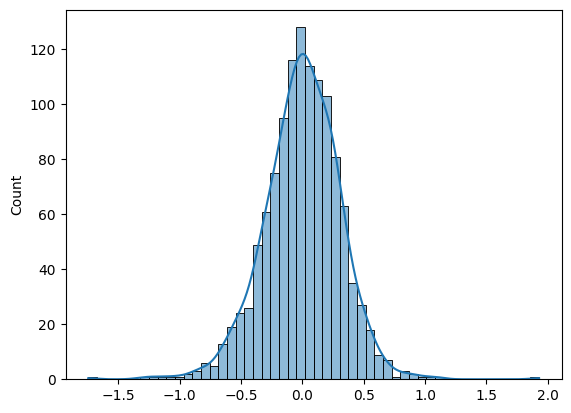

In [273]:
#Plot histogram of residuals for normality assumption

sns.histplot(residuals, kde = True)

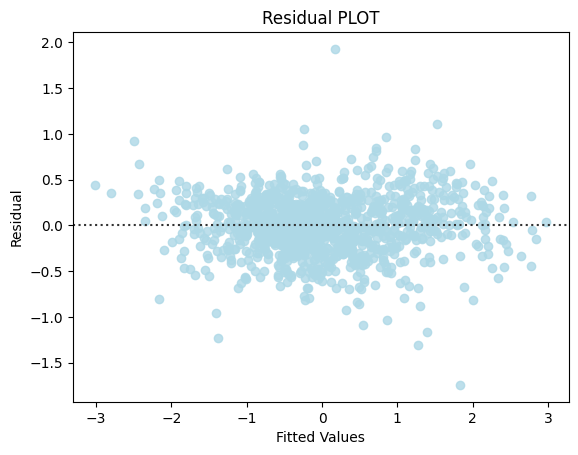

In [274]:
#Linearity of variables

#predicted values
fitted = ols_model_8_test.fittedvalues

sns.residplot(x = fitted, y = residuals, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

In [275]:
#importing necessary libraries for Goldfeld–Quandt test to check homoscedasticity

from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

import statsmodels.stats.api as sms

from statsmodels.compat import lzip

In [276]:
#hypothesis testing

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(Y_test, X_test)

lzip(name, test)

[('F statistic', np.float64(1.2059643053726412)),
 ('p-value', np.float64(0.012183394398316727))]

**Observations -**

*   We can confirm all assumptions for linearity 1) mean of residuals = 0, roughly. 2) Normality of error terms, 3) Linearity of variables i.e. residuals aren't correlated - the model data also passes the last Goldfeld-Quandt test for homoscedasticity at the 5% significance level.
*   The model may benefit from some non-linear gearing, but at least we can employ the linear regression technique as a baseline knowing that the explanatory power of the model is valid against the nature of the transformed data.
*   Let's look at some regularization techniques to mitigate our mild overfitting (some variable insignificance at the test stage), before exploring nonlinearity.





### **Ridge Regression**

**Ridge Prediction on train & test data**

In [277]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#fitting Ridge with the train & test data & features
ridge = Ridge()
ridge.fit(X,Y)
y_pred = ridge.predict(X)
y_pred_test = ridge.predict(X_test)

print("*********Training set Metrics**************")
print("R-Squared:", r2_score(y_pred, Y))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred,Y)))
print('MAE: ', mean_absolute_error(y_pred,Y))

print("********Test set Metrics**************")
print("R-Squared:", r2_score(y_pred_test, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred_test,Y_test)))
print('MAE: ', mean_absolute_error(y_pred_test,Y_test))

*********Training set Metrics**************
R-Squared: 0.8730333587703962
RMSE:  0.33562089441145904
MAE:  0.2476999713046564
********Test set Metrics**************
R-Squared: 0.8923305249244116
RMSE:  0.31561526202228235
MAE:  0.2413407040888091


**Observations -**

*   Our model performs broadly just as well after applying the Ridge regression technique in terms of R-squared, RMSE & MAE performance metrics, relative to the standard OLS regression - in fact, there is a marginal loss of accuracy in the model.
*   There is a greater delta between the model performance on the train & test data set after employing the regularization technique, which indicates that the regularization penalty may have been set too high.
*   Let's look at tuning the L2 penalty hyperparamater for optimal performance on the test data set for a linear regression model.








**Evaluating performance using Cross Validation**

In [278]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [281]:
#tuning the regularization parameter using cross validation (k = 5)

# Create a Ridge regression object
ridge = Ridge()

# Define the range of alpha values to test
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

search = GridSearchCV(ridge, param_grid, scoring = 'neg_mean_squared_error', cv=5)

search.fit(X,Y)

search.best_params_

{'alpha': 10.0}

In [282]:
#ridge regression with optimal alpha

ridge_final = Ridge(alpha = 10)
ridge_final.fit(X,Y)

ridge_final

Ridge(alpha=10)

In [283]:
y_pred2 = ridge_final.predict(X)
y_pred2_test = ridge_final.predict(X_test)

In [284]:
print("*********Training set Metrics**************")
print("R-Squared:", r2_score(y_pred2, Y))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred2,Y)))
print('MAE: ', mean_absolute_error(y_pred2,Y))

print("********Test set Metrics**************")
print("R-Squared:", r2_score(y_pred2_test, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred2_test,Y_test)))
print('MAE: ', mean_absolute_error(y_pred2_test,Y_test))

*********Training set Metrics**************
R-Squared: 0.8727921723739305
RMSE:  0.3356243713229854
MAE:  0.24771667090229052
********Test set Metrics**************
R-Squared: 0.8921679979966858
RMSE:  0.3155565013116262
MAE:  0.24134801773633746


**Observations -**

*   There is negligable difference in performance on the models once using regularization to mitigate overfitting on the train data.
*   This shows that the model is somewhat robust in the sense that it is adjusting well to 'unseen' data with or without adjusting the alpha hyperparamter for the model coefficients.
*   Perhaps the linear model is performing efficiently after our feature selection - also, the assumptions for linearity are met. So far, we are enticed to utilize the linear regression with or without hyperparamter tuning.

*   Let's explore whether a different non-linear model might capture the variance in our data better...






### **Decision Tree**

In [285]:
from sklearn.tree import DecisionTreeRegressor

In [286]:
#creating the regression on our train data

reg = DecisionTreeRegressor(max_depth=3)

reg.fit(X, Y)

DecisionTreeRegressor(max_depth=3)

In [287]:
y_pred = reg.predict(X)

mse = mean_squared_error(Y, y_pred)
print("R-Squared:", r2_score(y_pred, Y))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred,Y)))
print('MAE: ', mean_absolute_error(y_pred,Y))

R-Squared: 0.6497480150598591
RMSE:  0.5093108056954047
MAE:  0.3929621211766616


In [288]:
# Hyper parameters range intialization for tuning

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [290]:
#running the hyperparameter tuning with GridSearch algorithm - this takes 10-12mins

tuning_model = GridSearchCV(reg, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, verbose=3)

tuning_model.fit(X,Y)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.698 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.815 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-1.034 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-1.012 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.662 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, spl

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
88200 fits failed out of a total of 151200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklea

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(max_depth=3),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [292]:
#best hyperparameters

tuning_model.best_params_

{'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [293]:
#best model score

tuning_model.best_score_

np.float64(-0.2918031136946572)

In [294]:
tuned_hyper_model = DecisionTreeRegressor(max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter='best')

In [295]:
tuned_hyper_model.fit(X,Y)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=60,
                      min_weight_fraction_leaf=0.1)

In [300]:
tuned_hyper_model.fit(X_test,Y_test)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=60,
                      min_weight_fraction_leaf=0.1)

In [301]:
tuned_pred = tuned_hyper_model.predict(X)
tuned_pred_test = tuned_hyper_model.predict(X_test)

In [303]:
# With hyperparameter tuned

from sklearn import metrics

print("*********Training set Metrics**************")
print("R-Squared:", r2_score(Y, tuned_pred))
print('MAE:', metrics.mean_absolute_error(Y,tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, tuned_pred)))

print("********Test set Metrics**************")
print("R-Squared:", r2_score(Y_test, tuned_pred_test))
print('MAE:', metrics.mean_absolute_error(Y_test,tuned_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, tuned_pred_test)))

*********Training set Metrics**************
R-Squared: 0.710813152069099
MAE: 0.4013907264625987
RMSE: 0.5377609579830996
********Test set Metrics**************
R-Squared: 0.733062140829528
MAE: 0.38612161405998585
RMSE: 0.5166602937815833


**Observations -**

*   The Decision Tree regression technique is adding non-linearity to the model, but is seemingly performing worse than our linear regression model. This reinforces our prior that the linear regression technique might be best suited to the nature of the data.
*   We are further disuaded from using the decision tree regression technique given the negative 'best score' outcome - i.e. the model explains less variance in the data than a simple horizontal line.
*   It is possible that, on revision, there is a mistake in data handling which is causing the decision tree to underperform. However, for the purposes of comparison, we can see that the linear model is maintaining better explanatory power.

*   We can explore decision tree feature importance in order to tune our feature selection for the linear model to see if this has a positive effect.



**Feature Importance**

In [314]:
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor()

In [315]:
reg.fit(X,Y)

ExtraTreesRegressor()

In [316]:
reg.feature_importances_

array([0.00000000e+00, 2.12632462e-02, 1.04578292e-01, 2.02773749e-02,
       2.28976182e-01, 1.30477963e-02, 2.06309222e-01, 2.94777273e-03,
       6.14682864e-03, 3.02693925e-03, 4.77009888e-03, 2.83205853e-03,
       7.07357793e-03, 3.18238149e-03, 3.19082233e-03, 7.55397778e-02,
       2.86926024e-01, 5.84102337e-03, 1.94314784e-03, 1.33821543e-03,
       3.78929018e-04, 1.11389023e-04, 2.41019119e-04, 5.78809485e-05])

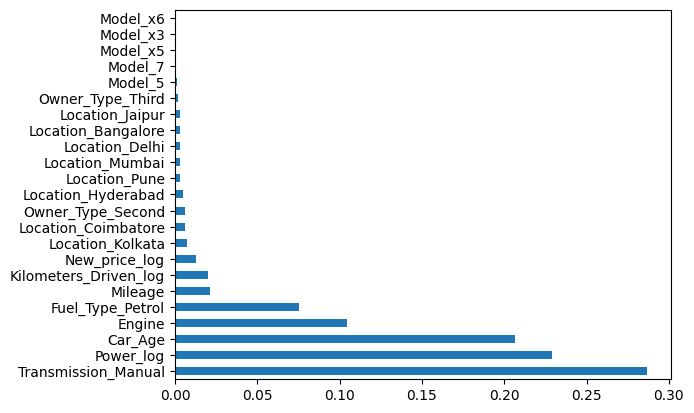

In [317]:
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

**Observations -**

*  The Extra Trees regressor gives accurate results and is less likely to overfit than single decision trees due to the extreme randomization in splitting, combined with ensemble voting.
*   While the performance of the decision tree model does not stack up to our linear model, the feature importance method is typically helpful in making robust predictions by measuring how much each feature helps across all trees.
*   The most important features in our model are presented above - perhaps we can emplore this in our linear regression model to refine it further.





### **Linear Regression Model - Revised**

In [319]:
#Let's revisit our latest linear regression features

X.columns

Index(['const', 'Mileage', 'Engine', 'Kilometers_Driven_log', 'Power_log',
       'New_price_log', 'Car_Age', 'Location_Bangalore', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second',
       'Owner_Type_Third', 'Model_5', 'Model_7', 'Model_x3', 'Model_x5',
       'Model_x6'],
      dtype='object')

In [320]:
#Arbitrarily, let's test the 12 most important features as described by the best trees regressor.

X = X.drop(["Model_x6","Model_x3","Model_x5","Model_7","Model_5","Owner_Type_Third","Location_Jaipur", "Location_Bangalore","Location_Delhi","Location_Mumbai","Location_Pune"], axis = 1)

In [321]:
vif_series9 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index = X.columns,
    dtype = float)

vif_series9

,0
const,1.000000
Mileage,2.824399
Engine,5.612089
Kilometers_Driven_log,1.644969
Power_log,4.814709
New_price_log,1.157701
Car_Age,1.789294
Location_Coimbatore,1.086998
Location_Hyderabad,1.072369
Location_Kolkata,1.080825


In [336]:
X = sm.add_constant(X)
ols_model_9 = sm.OLS(Y, X).fit()
ols_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     2988.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:08:30   Log-Likelihood:                -1688.8
No. Observations:                4814   AIC:                             3404.
Df Residuals:                    4801   BIC:                             3488.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.073e-16      0.005  -2.16e-14      1.000      -0.010       0.010
Mileage                  -0.0233      0.008     -2.797      0.005      -0.040      -0.007
Engine                    0.1703      0.012     14.498      0.000       0.147       0.193
Kilometers_Driven_log    -0.0791      0.006    -12.437      0.000      -0.092      -0.067
Power_log                 0.4418      0.011     40.594      0.000       0.420       0.463
New_price_log             0.0416      0.005      7.803      0.000       0.031       0.052
Car_Age                  -0.4126      0.007    -62.199      0.000      -0.426      -0.400
Location_Coimbatore       0.0489      0.005      9.463      0.000       0.039       0.059
Location_Hyderabad        0.0544      0.005     10.602      0.000       0.044       0.065
Location_Kolkata         -0.0714      0.005    -13.842      0.000      -0.081      -0.061
Fuel_Type_Petrol         -0.1401      0.007    -19.929      0.000      -0.154      -0.126
Transmission_Manual      -0.1593      0.007    -24.232      0.000      -0.172      -0.146
Owner_Type_Second        -0.0193      0.005     -3.696      0.000      -0.030      -0.009
==============================================================================
Omnibus:                      863.349   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14167.688
Skew:                          -0.363   Prob(JB):                         0.00
Kurtosis:                      11.373   Cond. No.                         5.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [331]:
#Fitting model for MLR Revised - Train Data

mlr = LinearRegression()

mlr.fit(X, Y)

print("********* MLR 3 Train Data - MLR 2 + DT High Importance Features **************")

#R-squared
print("R-Squared:", mlr.score(X, Y))

#RMSE
se_ols_model_revised = (Y - mlr.predict(X))**2
rmse_ols_model_revised = math.sqrt(se_ols_model_revised.mean())
print('RMSE: ', rmse_ols_model_revised)

#MAE
mae = np.mean(np.abs((Y - mlr.predict(X))))
print('MAE: ', mae)

#MAPE
mape = np.mean(np.abs((Y - mlr.predict(X))/Y) * 100)
mape = round(mape,2)
print('MAPE: ', mape,'\n')


********* MLR 3 Train Data - MLR 2 + DT High Importance Features **************
R-Squared: 0.881904329136983
RMSE:  0.3436505068569185
MAE:  0.25437385022341713
MAPE:  210.83 



**Testing revised model on test data**

In [332]:
X.columns

Index(['const', 'Mileage', 'Engine', 'Kilometers_Driven_log', 'Power_log',
       'New_price_log', 'Car_Age', 'Location_Coimbatore', 'Location_Hyderabad',
       'Location_Kolkata', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Second'],
      dtype='object')

In [333]:
#remove all columns from test data that were removed in the train process

X_temp = X.drop(["const"], axis = 1)

test_features = list(X_temp.columns)

X_test = df_test_scaled[test_features]

Y_test = df_test_scaled['Price_log']

In [335]:
mlr.fit(X_test, Y_test)

print("********* MLR 3 Test Data - MLR 2 + DT High Importance Features **************")

#R-squared
print("R-Squared:", mlr.score(X_test, Y_test))

#RMSE
se_ols_model_revised_test = (Y_test - mlr.predict(X_test))**2
rmse_ols_model_revised_test = math.sqrt(se_ols_model_revised.mean())
print('RMSE: ', rmse_ols_model_revised_test)

#MAE
mae = np.mean(np.abs((Y_test - mlr.predict(X_test))))
print('MAE: ', mae)

#MAPE
mape = np.mean(np.abs((Y_test - mlr.predict(X_test))/Y_test) * 100)
mape = round(mape,2)
print('MAPE: ', mape,'\n')


********* MLR 3 Test Data - MLR 2 + DT High Importance Features **************
R-Squared: 0.8986977173734495
RMSE:  0.3436505068569185
MAE:  0.2427250879042034
MAPE:  154.88 



**Observations -**

*   The revised model - MLR 3 - maintains similar explanatory power to our MLR 2 model, which indicates that removing the less 'important' features, as per our extra trees regressor does not remove much explanatory power.
*   Additionally, the model performs better on test data than it does on the train data, validating the model in terms of predictivity for unseen data (no indication of overfitting). We can therefor utilize this as a more practical output for business recommendation.



## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?








**Response -**

*   The baseline Linear Regression technique performs just as well after hyperparameter tuning with Ridge regression, and performs better than the non-linear decision tree regression method both before and after hyperparamater tuning.
*   The decision tree regression method allowed us to refine our MLR 2 linear regression model, which showed that the extra trees regressor was robust in terms of feature selection, but more practical in linear implementation.

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**Response -**

*   We can see that there is a lot of noise in the data for predicting used car prices in the Indian market.
*   The most relevant predictive features are, in fact, the most salient to a customer - i.e. age of car, power/output capacity, function style (manual vs. automatic).
*   The price of the car is less distinguished by the physical market it is being sold in (i.e. linked to macro economics), this is unless you are in the largest markets like Hyderabad or Bangalore.
*   The brand of the car isn't necessarily important for used vehicles, unless it is a Ford, in which case the car value is most sensitive to diminishing.
*   The price of the used car is most captured by predictive features taking a linear form. The combination of linear regression & non-linear decision tree techniques allow for an efficient pricing model that captures more realistic consumption patterns with regards to prices paid on used cars across Indian markets. [below].







**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

In [337]:
ols_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     2988.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:08:44   Log-Likelihood:                -1688.8
No. Observations:                4814   AIC:                             3404.
Df Residuals:                    4801   BIC:                             3488.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.073e-16      0.005  -2.16e-14      1.000      -0.010       0.010
Mileage                  -0.0233      0.008     -2.797      0.005      -0.040      -0.007
Engine                    0.1703      0.012     14.498      0.000       0.147       0.193
Kilometers_Driven_log    -0.0791      0.006    -12.437      0.000      -0.092      -0.067
Power_log                 0.4418      0.011     40.594      0.000       0.420       0.463
New_price_log             0.0416      0.005      7.803      0.000       0.031       0.052
Car_Age                  -0.4126      0.007    -62.199      0.000      -0.426      -0.400
Location_Coimbatore       0.0489      0.005      9.463      0.000       0.039       0.059
Location_Hyderabad        0.0544      0.005     10.602      0.000       0.044       0.065
Location_Kolkata         -0.0714      0.005    -13.842      0.000      -0.081      -0.061
Fuel_Type_Petrol         -0.1401      0.007    -19.929      0.000      -0.154      -0.126
Transmission_Manual      -0.1593      0.007    -24.232      0.000      -0.172      -0.146
Owner_Type_Second        -0.0193      0.005     -3.696      0.000      -0.030      -0.009
==============================================================================
Omnibus:                      863.349   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14167.688
Skew:                          -0.363   Prob(JB):                         0.00
Kurtosis:                      11.373   Cond. No.                         5.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

log(Used Car Price) = -1.073E-16 -0.1593 * Transmission_Manual + 0.4418 * Power_log - 0.4126 * Car_Age - 0.1401 * Fuel_Type_Petrol + 0.1703 * Engine - 0.0791 * Kilometers_Driven_log - 0.0233 * Mileage + 0.0146 * New_price_log + 0.0489 * Location_Coimbatore - 0.0714 * Location Kolkata + 0.0544 * Location Hyderabad - 0.0193 Owner_Type_Second


*   Usefullness described above.



**Business Insights & Suggestions -**

*   Should Cars4U want to employ differential pricing, they should employ marketing techniques that utilize differences in the features listed above.
*   The most significant features, as per regression coefficients are the power of the used car, the age of the used car & the engine of the used car - i.e. these features have the greatest marginal influence on the price of a used car in the market.
*   For example then, Cars4U could specialize in selling an inventory of used cars that outperform along these metrics and/or employ higher prices for their existing fleet of used cars that have greater performance along these metrics.
*   In doing so, they will be able to capitalize on price descrimination in the market for used cars efficiently, becoming more profitable while maintaining a similar business model - all because of consumption data leverage.
*   The model assumes that no variables interact, and therefor could benefit from a more in depth analysis for how our features impact one another. This could allow for Cars4U to create a more sophisticated model of price descrimination by - for example - segmenting target consumers in different geographies (using location features) to expand the business as efficiently as possible.
*   The model is, of course, generalizing on a sample of data from 2018-19. Therefor, another consideration to account for is changing preferences of the consumer over time.




